In [1]:
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

import os
from os.path import join

import pandas as pd
import numpy as np

import seaborn as sns

In [2]:
##합칠 때 주석 풀기

# C_df = pd.read_csv("./data/covid19/Case.csv")
# PI_df = pd.read_csv("./data/covid19/PatientInfo.csv")
# Pol_df = pd.read_csv("./data/covid19/Policy.csv")
# R_df = pd.read_csv("./data/covid19/Region.csv")
# ST_df = pd.read_csv("./data/covid19/SearchTrend.csv")
# SF_df = pd.read_csv("./data/covid19/SeoulFloating.csv")
# T_df = pd.read_csv("./data/covid19/Time.csv")
# TA_df = pd.read_csv("./data/covid19/TimeAge.csv")
# TG_df = pd.read_csv("./data/covid19/TimeGender.csv")
# TP_df = pd.read_csv("./data/covid19/TimeProvince.csv")
# W_df = pd.read_csv("./data/covid19/Weather.csv")

In [3]:
data_dir = os.getenv('HOME')+'/aiffel/datathon/data'

floating_data_path = join(data_dir, 'SeoulFloating.csv')

SF_df = pd.read_csv(floating_data_path)

In [4]:
print('floating data dim : {}'.format(SF_df.shape))

floating data dim : (1084800, 7)


In [5]:
print(SF_df.columns)

Index(['date', 'hour', 'birth_year', 'sex', 'province', 'city', 'fp_num'], dtype='object')


In [6]:
SF_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1084800 entries, 0 to 1084799
Data columns (total 7 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   date        1084800 non-null  object
 1   hour        1084800 non-null  int64 
 2   birth_year  1084800 non-null  int64 
 3   sex         1084800 non-null  object
 4   province    1084800 non-null  object
 5   city        1084800 non-null  object
 6   fp_num      1084800 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 57.9+ MB


In [7]:
SF_df.head()

,date,hour,birth_year,sex,province,city,fp_num
0,2020-01-01,0,20,female,Seoul,Dobong-gu,19140
1,2020-01-01,0,20,male,Seoul,Dobong-gu,19950
2,2020-01-01,0,20,female,Seoul,Dongdaemun-gu,25450
3,2020-01-01,0,20,male,Seoul,Dongdaemun-gu,27050
4,2020-01-01,0,20,female,Seoul,Dongjag-gu,28880


In [8]:
SF_df.tail()

,date,hour,birth_year,sex,province,city,fp_num
1084795,2020-05-31,21,40,female,Seoul,Dobong-gu,27620
1084796,2020-05-31,21,40,female,Seoul,Songpa-gu,56560
1084797,2020-05-31,21,50,female,Seoul,Gangdong-gu,38960
1084798,2020-05-31,22,60,female,Seoul,Guro-gu,25420
1084799,2020-05-31,23,40,male,Seoul,Eunpyeong-gu,38650


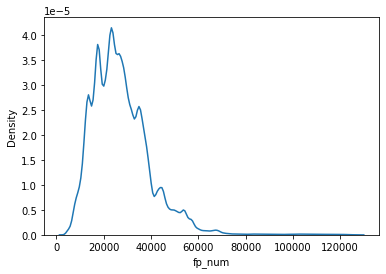

In [9]:
sns.kdeplot(SF_df['fp_num'])
plt.show()

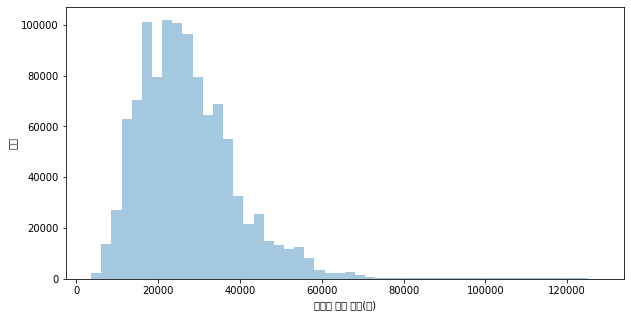

In [10]:
plt.figure(figsize=(10,5)) # 빈 캔버스 사이즈 지정
dist=sns.distplot(SF_df['fp_num'],kde=False) # kde=False를 넣어보자
dist.set_xlabel("바이크 주행 시간(분)")
dist.set_ylabel("비율")
plt.show() # 다 그려진 캔버스 보여주기

# 정부 정책에 따른 확진자수 변화 

In [11]:
data_dir = os.getenv('HOME')+'/aiffel/datathon/data'

policy_data_path = join(data_dir, 'Policy.csv')

Pol_df = pd.read_csv(policy_data_path)

In [12]:
Pol_df.tail()

,policy_id,country,type,gov_policy,detail,start_date,end_date
56,57,Korea,Transformation,Logistics center,On-site inspection of major logistics faciliti...,2020-05-29,2020-06-11
57,58,Korea,Transformation,Wearing of masks,"Mandatory wearing of passenger mask domestic, ...",2020-05-27,NaN
58,59,Korea,Transformation,Wearing of masks,Drivers such as buses and taxis can refuse to ...,2020-05-26,NaN
59,60,Korea,Technology,KI-Pass: Korea Internet - Pass,new quick response (QR) code system this week ...,2020-06-10,NaN
60,61,Korea,Health,Extends Tightened Quarantine Measures,Gov't Extends Tightened Quarantine Measures in...,2020-05-28,2020-06-14


In [13]:
patient_data_path = join(data_dir, 'PatientInfo.csv')

PI_df = pd.read_csv(patient_data_path)
#patient["confirmed_date"] = pd.to_datetime(patient["confirmed_date"])
print(PI_df.shape)

(5165, 14)


In [14]:
PI_df.head()

,patient_id,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,male,50s,Korea,Seoul,Gangseo-gu,overseas inflow,NaN,75,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,male,30s,Korea,Seoul,Jungnang-gu,overseas inflow,NaN,31,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,male,50s,Korea,Seoul,Jongno-gu,contact with patient,2002000001,17,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,male,20s,Korea,Seoul,Mapo-gu,overseas inflow,NaN,9,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,female,20s,Korea,Seoul,Seongbuk-gu,contact with patient,1000000002,2,NaN,2020-01-31,2020-02-24,NaN,released


In [15]:
# patient_null = patient['patient_id'].dropna()
# print(patient_null.shape)
# patient.tail()

In [16]:
#x축
from datetime import datetime
duration = PI_df["confirmed_date"].unique()
# duration = pd.to_datetime(duration)

duration= duration[:-1]
duration = pd.to_datetime(duration).sort_values()
print(duration)
type(duration)
# duration=duration.loc[datetime(2020, 1, 23):datetime(2020, 6, 30)]

DatetimeIndex(['2020-01-20', '2020-01-23', '2020-01-26', '2020-01-27',
               '2020-01-30', '2020-01-31', '2020-02-01', '2020-02-02',
               '2020-02-03', '2020-02-05',
               ...
               '2020-06-21', '2020-06-22', '2020-06-23', '2020-06-24',
               '2020-06-25', '2020-06-26', '2020-06-27', '2020-06-28',
               '2020-06-29', '2020-06-30'],
              dtype='datetime64[ns]', length=148, freq=None)


pandas.core.indexes.datetimes.DatetimeIndex

In [17]:
#y축
# patient.groupby(patient['confirmed_date']).count() 
confirmed_case = PI_df["confirmed_date"].value_counts()
print(confirmed_case.shape)
confirmed_case = confirmed_case.sort_index() 

(148,)


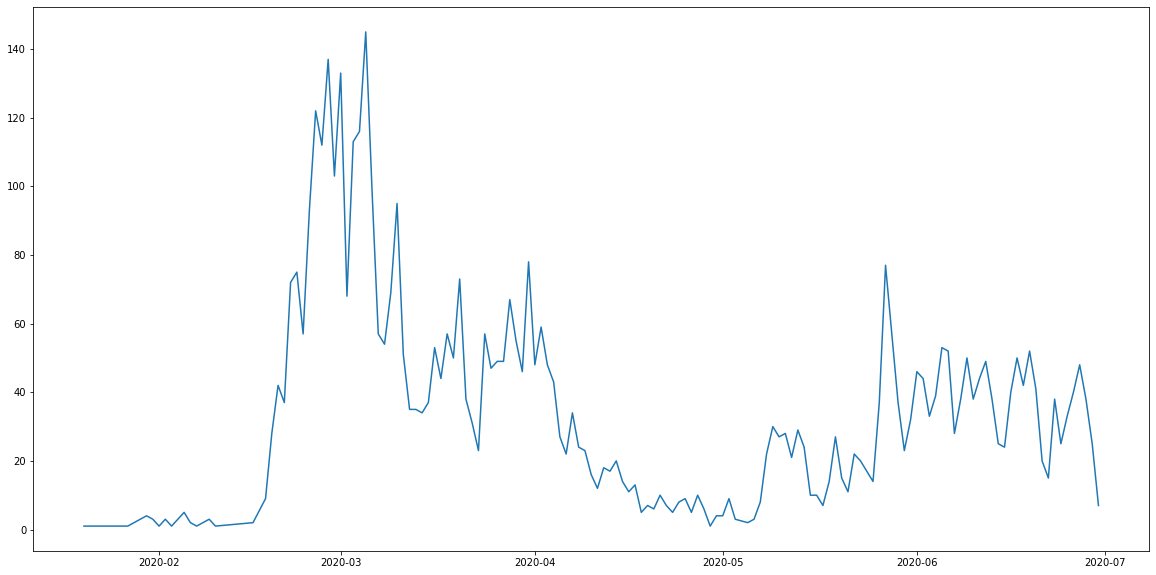

In [18]:
plt.figure(figsize=(20,10)) 
plt.plot(duration,confirmed_case)
plt.show()

확진자 감소 추이가 

In [19]:
search_data_path = join(data_dir, 'SearchTrend.csv')

ST_df = pd.read_csv(search_data_path)
#patient["confirmed_date"] = pd.to_datetime(patient["confirmed_date"])
print(ST_df.shape)

(1642, 5)


In [20]:
ST_df.columns

Index(['date', 'cold', 'flu', 'pneumonia', 'coronavirus'], dtype='object')

In [21]:
ST_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1642 entries, 0 to 1641
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         1642 non-null   object 
 1   cold         1642 non-null   float64
 2   flu          1642 non-null   float64
 3   pneumonia    1642 non-null   float64
 4   coronavirus  1642 non-null   float64
dtypes: float64(4), object(1)
memory usage: 64.3+ KB


In [22]:
ST_df["date"] = pd.to_datetime(ST_df["date"])

In [23]:
ST_df = ST_df[(ST_df['date']>='2020-01-01') & (ST_df['date']<='2020-05-31')]
ST_df.head()

,date,cold,flu,pneumonia,coronavirus
1461,2020-01-01,0.14454,0.48434,0.44880,0.01699
1462,2020-01-02,0.19508,0.85751,0.36471,0.01827
1463,2020-01-03,0.19581,0.80443,0.46598,0.02845
1464,2020-01-04,0.60343,0.86961,0.49571,0.02136
1465,2020-01-05,0.20081,0.84152,0.41644,0.01927


In [24]:
ST_df = ST_df.set_index('date')

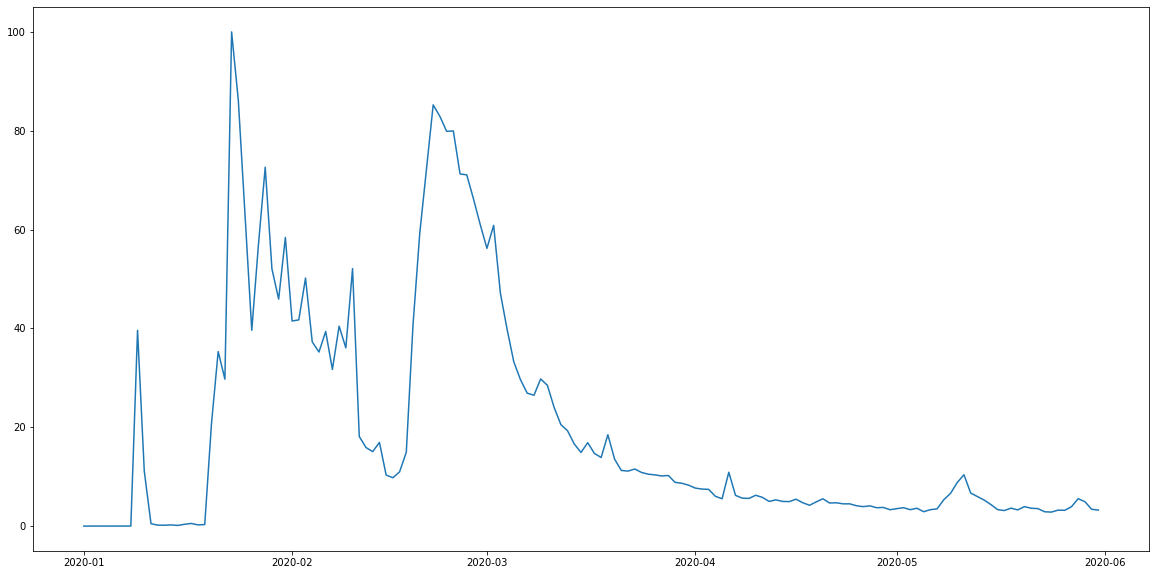

In [25]:
covid = ST_df["coronavirus"]
plt.figure(figsize=(20,10)) 
plt.plot(covid)
plt.show()

In [26]:
cold = ST_df["cold"]
flu = ST_df["flu"]
pne = ST_df["pneumonia"]

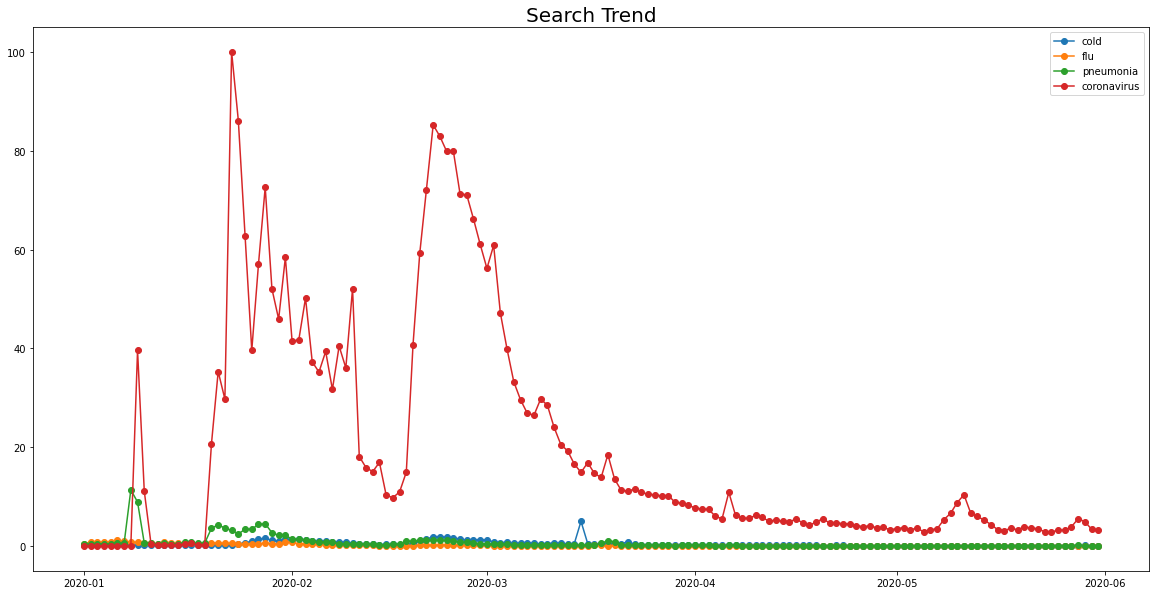

In [27]:
fig = plt.figure(figsize=(20,10)) 
ax = fig.add_subplot()

ax.plot(cold,marker='o',label='cold') ## 선그래프 생성
ax.plot(flu,marker='o',label='flu') 
ax.plot(pne,marker='o',label='pneumonia') 
ax.plot(covid,marker='o',label='coronavirus') 
ax.legend() ## 범례

plt.title('Search Trend',fontsize=20)
plt.show()

# 일자별 이동량 합산

In [101]:
floating_sum = SF_df.groupby(by = 'date').fp_num.agg('sum')
floating_sum

date
2020-01-01    192406170
2020-01-02    202929360
2020-01-03    203337150
2020-01-04    197396050
2020-01-05    195747670
                ...    
2020-05-27    199293080
2020-05-28    199209840
2020-05-29    140847320
2020-05-30    189674150
2020-05-31    188346500
Name: fp_num, Length: 151, dtype: int64

In [102]:
# a = fl.max()
# index = fl.index(a)
# index
floating_sum[floating_sum == floating_sum.max()].index[0]

'2020-02-23'

In [103]:
SF_df[SF_df["date"] =='2020-02-23'] 

,date,hour,birth_year,sex,province,city,fp_num
381600,2020-02-23,0,20,female,Seoul,Dobong-gu,38930
381601,2020-02-23,0,20,male,Seoul,Dobong-gu,39140
381602,2020-02-23,0,20,female,Seoul,Dongdaemun-gu,55030
381603,2020-02-23,0,20,male,Seoul,Dongdaemun-gu,59200
381604,2020-02-23,0,20,female,Seoul,Dongjag-gu,62770
...,...,...,...,...,...,...,...
388795,2020-02-23,23,70,male,Seoul,Yangcheon-gu,23960
388796,2020-02-23,23,70,female,Seoul,Yeongdeungpo-gu,35230
388797,2020-02-23,23,70,male,Seoul,Yeongdeungpo-gu,26130
388798,2020-02-23,23,70,female,Seoul,Yongsan-gu,25000


In [104]:
floating_sum[floating_sum == floating_sum.min()].index[0]

'2020-05-29'

In [105]:
a = floating_sum.loc["2020-02-23"]
a=a//2
a

186543775

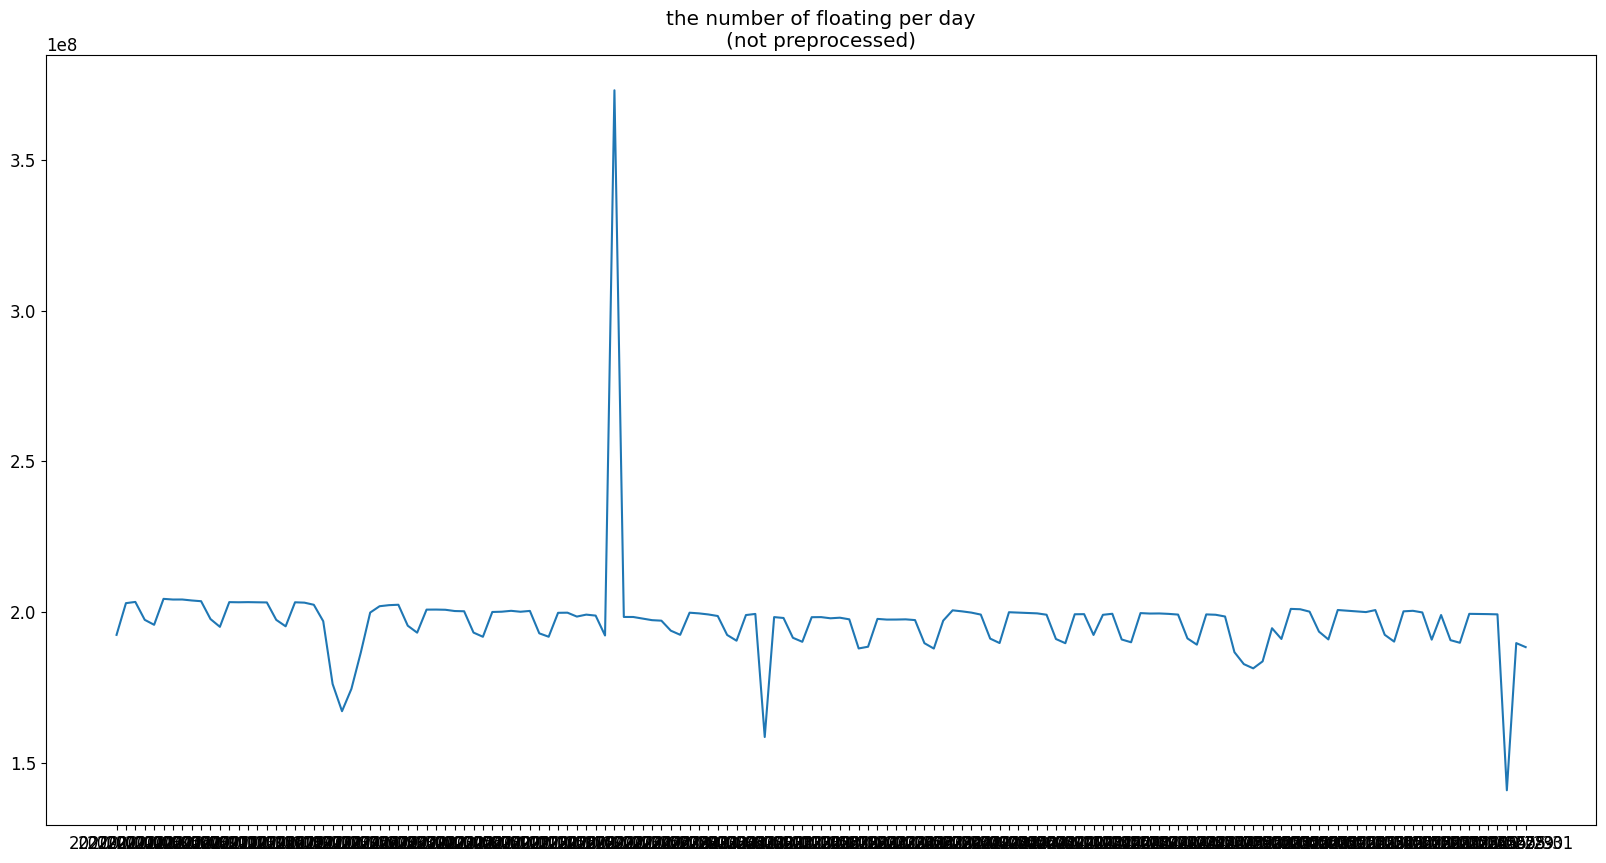

In [115]:
plt.figure(figsize=(20,10)) 
plt.title("""the number of floating per day\n""" """(not preprocessed)""")
plt.plot(floating_sum)
plt.show()

In [107]:
flt_sum = floating_sum.copy()
flt_sum.loc["2020-02-23"] = a
flt_sum.loc["2020-03-05"] = a
print(flt_sum.loc["2020-02-23"])
print(flt_sum.loc["2020-03-05"] )

186543775
186543775


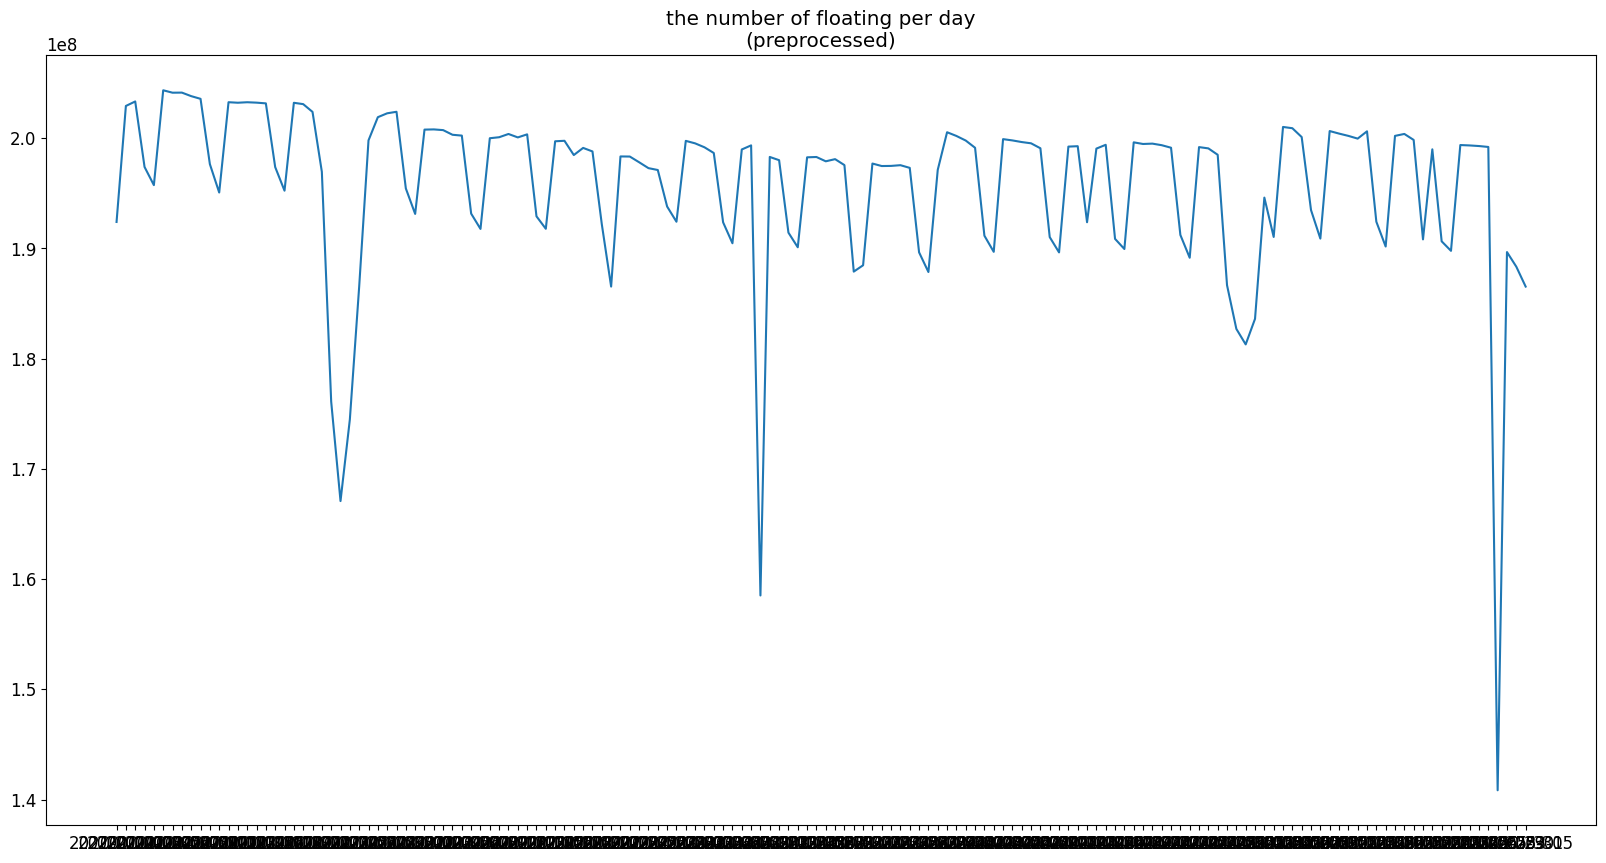

In [116]:
plt.figure(figsize=(20,10)) 
plt.title("""the number of floating per day\n""" """(preprocessed)""")
plt.plot(flt_sum)
plt.show()

# 연령대별 이동량 계산

In [33]:
from datetime import datetime

# floating2.date = pd.to_datetime(floating2["date"])
# floating2 = floating2.set_index('date')
SF_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1084800 entries, 0 to 1084799
Data columns (total 7 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   date        1084800 non-null  object
 1   hour        1084800 non-null  int64 
 2   birth_year  1084800 non-null  int64 
 3   sex         1084800 non-null  object
 4   province    1084800 non-null  object
 5   city        1084800 non-null  object
 6   fp_num      1084800 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 57.9+ MB


In [34]:
birth = SF_df.groupby(by = 'birth_year').fp_num.agg('sum')
birth.head()

birth_year
20    5441769700
30    6069018790
40    6054699830
50    5675739830
60    3706127050
Name: fp_num, dtype: int64

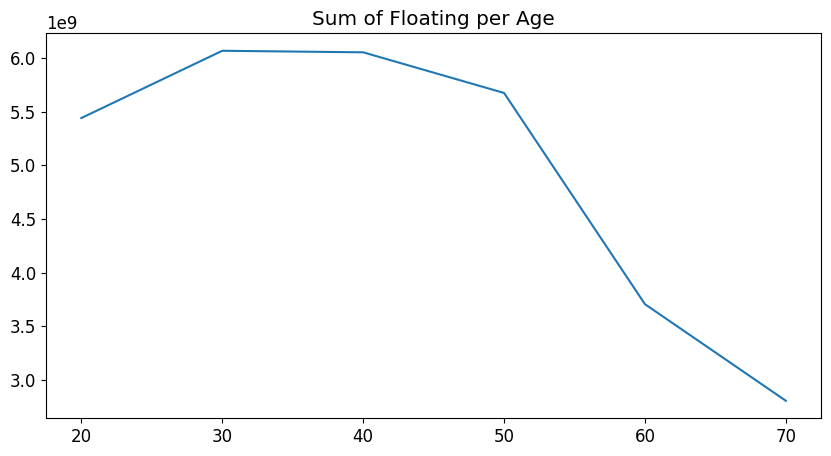

In [184]:
plt.figure(figsize=(10,5)) 
plt.title("Sum of Floating per Age")
plt.plot(birth)
plt.show()

경제활동이 활발한 30-40대의 이동량이 많은 것을 볼 수 있다.

In [36]:
twn = SF_df[SF_df["birth_year"] == 20]
twn.head()
twn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180800 entries, 0 to 1084794
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   date        180800 non-null  object
 1   hour        180800 non-null  int64 
 2   birth_year  180800 non-null  int64 
 3   sex         180800 non-null  object
 4   province    180800 non-null  object
 5   city        180800 non-null  object
 6   fp_num      180800 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 11.0+ MB


In [37]:
twn["date"] = pd.to_datetime(twn["date"])
twn = pd.DataFrame(twn)
# twn = twn.groupby(by = 'date').agg((fp_num='sum'))
type(twn)
twn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180800 entries, 0 to 1084794
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   date        180800 non-null  datetime64[ns]
 1   hour        180800 non-null  int64         
 2   birth_year  180800 non-null  int64         
 3   sex         180800 non-null  object        
 4   province    180800 non-null  object        
 5   city        180800 non-null  object        
 6   fp_num      180800 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 11.0+ MB


### 각 연령대별 일자-시간별 이동량 합계

In [38]:
twn_sum = twn.groupby(['date','hour']).agg({"fp_num" : sum})
twn_sum

fp_num
date       hour         
2020-01-01 0     1448180
           1     1433590
           2     1424810
           3     1416150
           4     1411090
...                  ...
2020-05-31 19    1498700
           20    1496200
           21    1488870
           22    1478950
           23    1468280

[3616 rows x 1 columns]

In [39]:
twn_sum_daily = twn.groupby(['date']).agg({"fp_num" : sum})
# twn_sum_daily = pd.DataFrame(twn_sum_daily)
twn_sum_daily.index


DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10',
               ...
               '2020-05-22', '2020-05-23', '2020-05-24', '2020-05-25',
               '2020-05-26', '2020-05-27', '2020-05-28', '2020-05-29',
               '2020-05-30', '2020-05-31'],
              dtype='datetime64[ns]', name='date', length=151, freq=None)

In [133]:
# 2. 데이터 준비
x = twn_sum_daily[(twn_sum_daily.index >='2020-01-20') & (twn_sum_daily.index<='2020-05-31')]
y1 = twn_sum_daily.fp_num[(twn_sum_daily.index>='2020-01-20') & (twn_sum_daily.index<='2020-05-31')]
y2 = confirmed_case[(confirmed_case.index>='2020-01-20') & (confirmed_case.index<='2020-05-31')]
y2 = pd.DataFrame(y2)
y2_date =  pd.date_range('2020-01-20', '2020-05-31')


In [138]:
y11 = y1.copy()
y11.index = pd.DatetimeIndex(y11.index)
y11 = y11.reindex(y2_date, fill_value=0)
y11[y11 == 0]

2020-03-05    0
Freq: D, Name: fp_num, dtype: int64

In [139]:
y22 = y2.copy()
y22.index = pd.DatetimeIndex(y22.index)
y22 = y22.reindex(y2_date, fill_value=0)
y22

,confirmed_date
2020-01-20,1
2020-01-21,0
2020-01-22,0
2020-01-23,1
2020-01-24,0
...,...
2020-05-27,77
2020-05-28,57
2020-05-29,37
2020-05-30,23


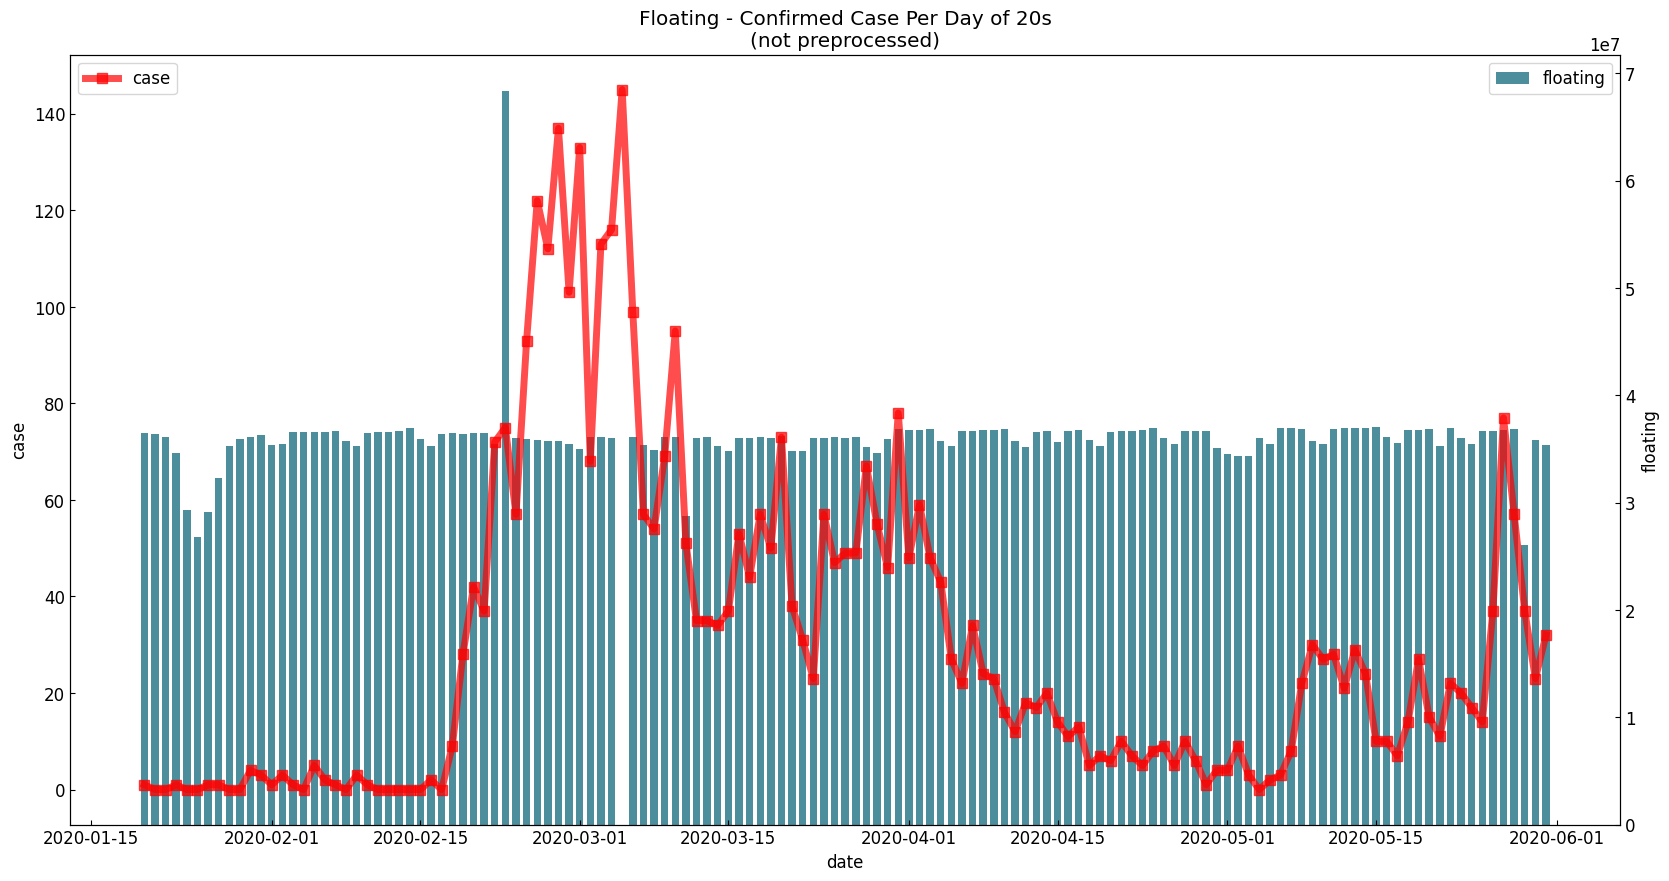

In [140]:
# 1. 기본 스타일 설정
plt.style.use('default')
plt.rcParams['figure.figsize'] = (20, 10)
plt.rcParams['font.size'] = 12

# 2. 데이터 준비
# x = twn_sum_daily[(twn_sum_daily.index >='2020-01-20') & (twn_sum_daily.index<='2020-05-31')]
# y1 = twn_sum_daily.fp_num[(twn_sum_daily.index>='2020-01-20') & (twn_sum_daily.index<='2020-05-31')]
# y2 = confirmed_case
# y2_1 = confirmed_case.astype(int)

# 3. 그래프 그리기

fig, ax1 = plt.subplots()
plt.title("""Floating - Confirmed Case Per Day of 20s\n""" """(not preprocessed)""")
ax1.plot(y2_date, y22, '-s', color='red', markersize=7, linewidth=5, alpha=0.7, label='case')
ax1.set_xlabel('date')
ax1.set_ylabel('case')
ax1.tick_params(axis='both', direction='in')

ax2 = ax1.twinx()
ax2.bar(y2_date, y11, color='#005f73', label='floating', alpha=0.7, width=0.7)
ax2.set_ylabel(r'floating')
ax2.tick_params(axis='y', direction='in')

ax1.set_zorder(ax2.get_zorder() + 10)
ax1.patch.set_visible(False)

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

In [141]:
y11.loc["2020-02-23"] = y11.loc["2020-02-23"] //2
y11.loc["2020-03-05"] = y11.loc["2020-02-23"] 
y11.loc["2020-02-23"] 

34158665

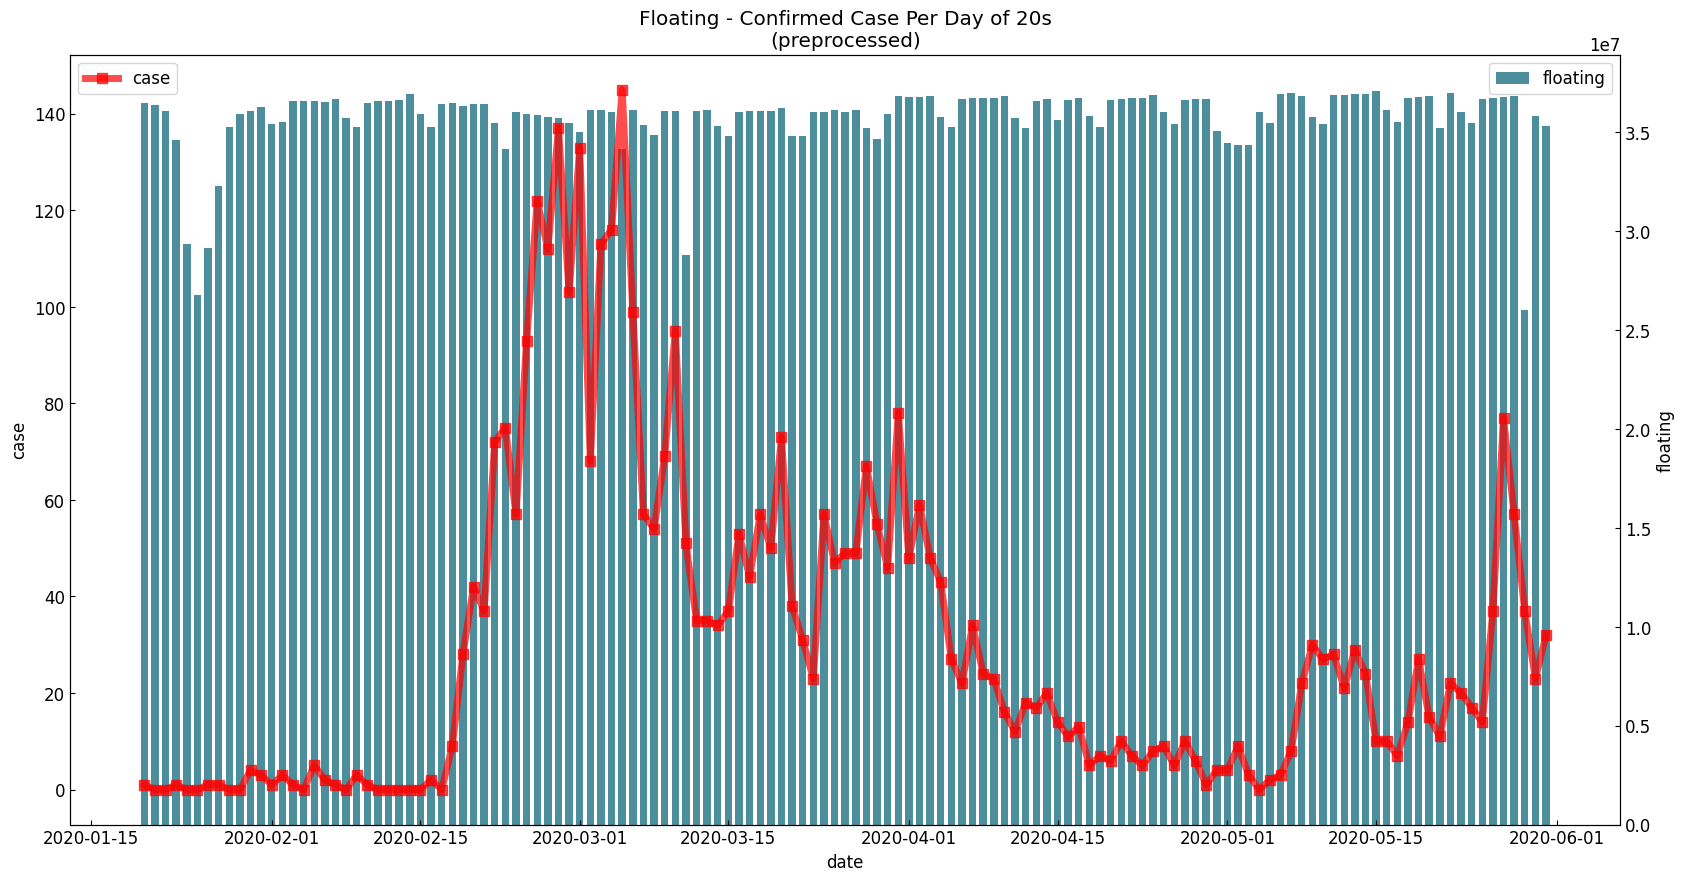

In [142]:
# 1. 기본 스타일 설정
plt.style.use('default')
plt.rcParams['figure.figsize'] = (20, 10)
plt.rcParams['font.size'] = 12

# 2. 데이터 준비
# x = twn_sum_daily[(twn_sum_daily.index >='2020-01-20') & (twn_sum_daily.index<='2020-05-31')]
# y1 = twn_sum_daily.fp_num[(twn_sum_daily.index>='2020-01-20') & (twn_sum_daily.index<='2020-05-31')]
# y2 = confirmed_case
# y2_1 = confirmed_case.astype(int)

# 3. 그래프 그리기
fig, ax1 = plt.subplots()
plt.title("""Floating - Confirmed Case Per Day of 20s\n""" """(preprocessed)""")
ax1.plot(y2_date, y22, '-s', color='red', markersize=7, linewidth=5, alpha=0.7, label='case')
ax1.set_xlabel('date')
ax1.set_ylabel('case')
ax1.tick_params(axis='both', direction='in')

ax2 = ax1.twinx()
ax2.bar(y2_date, y11, color='#005f73', label='floating', alpha=0.7, width=0.7)
ax2.set_ylabel(r'floating')
ax2.tick_params(axis='y', direction='in')

ax1.set_zorder(ax2.get_zorder() + 10)
ax1.patch.set_visible(False)

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

In [44]:
thr = SF_df[SF_df["birth_year"] == 30]
thr.head()

,date,hour,birth_year,sex,province,city,fp_num
1200,2020-01-01,0,30,female,Seoul,Dobong-gu,21950
1201,2020-01-01,0,30,male,Seoul,Dobong-gu,22230
1202,2020-01-01,0,30,female,Seoul,Dongdaemun-gu,26060
1203,2020-01-01,0,30,male,Seoul,Dongdaemun-gu,28910
1204,2020-01-01,0,30,female,Seoul,Dongjag-gu,31610


In [45]:
thr["date"] = pd.to_datetime(thr["date"])
thr = pd.DataFrame(thr)
thr_sum = thr.groupby(['date','hour']).agg({"fp_num" : sum})
thr_sum

fp_num
date       hour         
2020-01-01 0     1583570
           1     1571090
           2     1562770
           3     1556670
           4     1551960
...                  ...
2020-05-31 19    1617240
           20    1624790
           21    1629130
           22    1630060
           23    1628230

[3616 rows x 1 columns]

In [176]:
thr_sum_daily = thr.groupby(['date']).agg({"fp_num" : sum})
y1 = thr_sum_daily.fp_num[(thr_sum_daily.index>='2020-01-20') & (thr_sum_daily.index<='2020-05-31')]

In [177]:
y11 = y1.copy()
y11.index = pd.DatetimeIndex(y11.index)
y11 = y11.reindex(y2_date, fill_value=0)

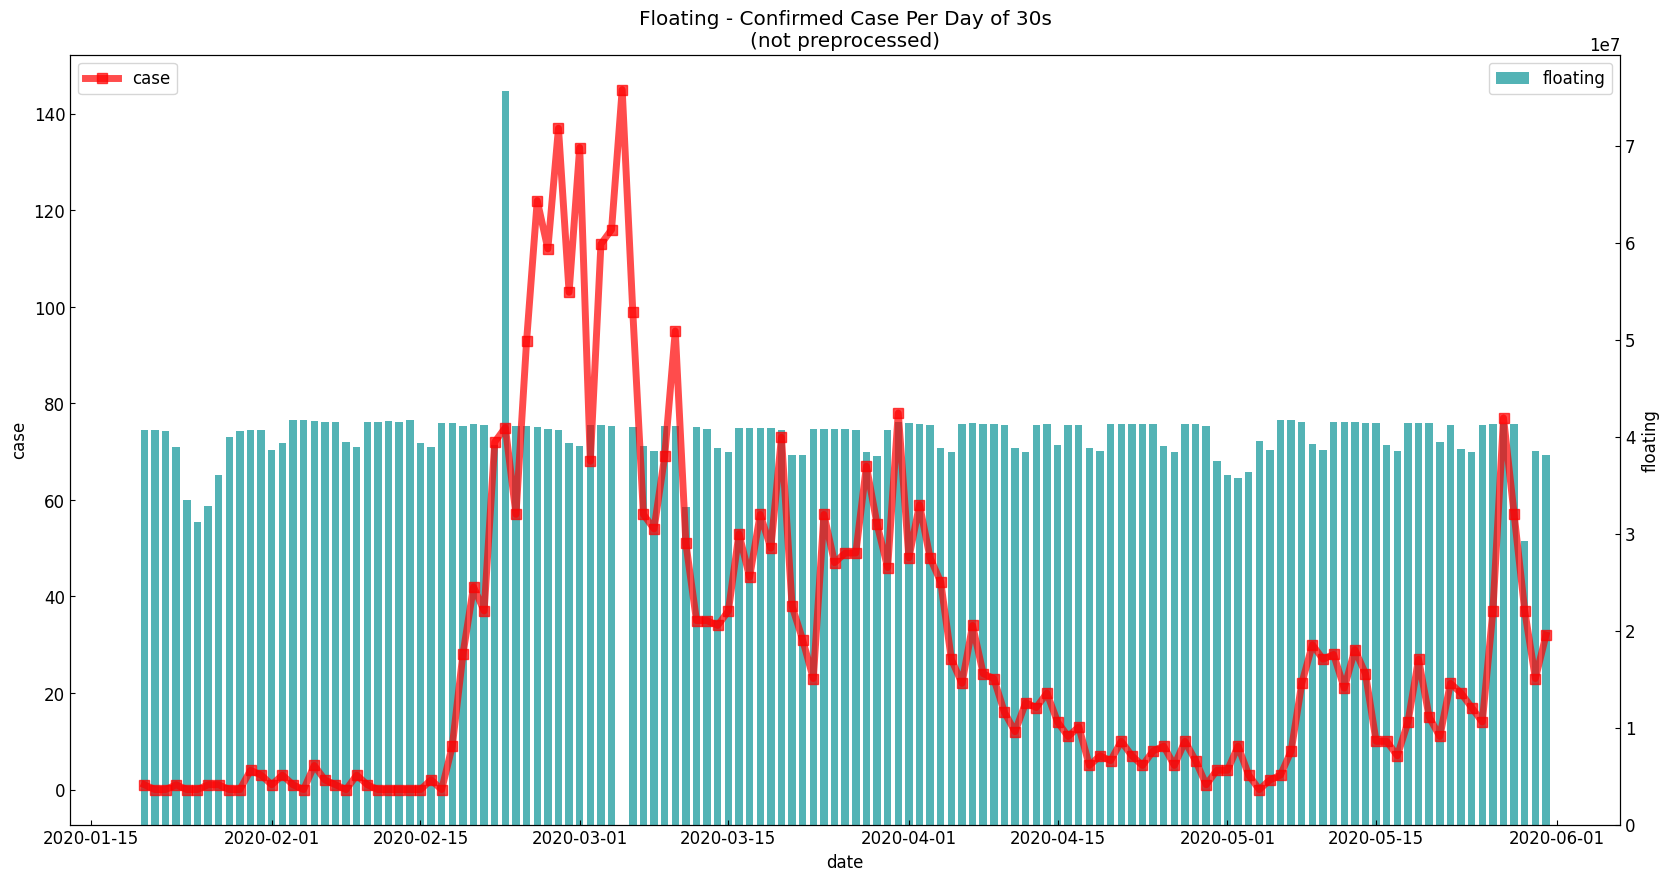

In [146]:
# 1. 기본 스타일 설정
plt.style.use('default')
plt.rcParams['figure.figsize'] = (20, 10)
plt.rcParams['font.size'] = 12

# 2. 데이터 준비
# x = twn_sum_daily[(twn_sum_daily.index >='2020-01-20') & (twn_sum_daily.index<='2020-05-31')]
# y1 = twn_sum_daily.fp_num[(twn_sum_daily.index>='2020-01-20') & (twn_sum_daily.index<='2020-05-31')]
# y2 = confirmed_case
# y2_1 = confirmed_case.astype(int)

# 3. 그래프 그리기
fig, ax1 = plt.subplots()
plt.title("""Floating - Confirmed Case Per Day of 30s\n""" """(not preprocessed)""")
ax1.plot(y2_date, y22, '-s', color='red', markersize=7, linewidth=5, alpha=0.7, label='case')
ax1.set_xlabel('date')
ax1.set_ylabel('case')
ax1.tick_params(axis='both', direction='in')

ax2 = ax1.twinx()
ax2.bar(y2_date, y11, color='#0a9396', label='floating', alpha=0.7, width=0.7)
ax2.set_ylabel(r'floating')
ax2.tick_params(axis='y', direction='in')

ax1.set_zorder(ax2.get_zorder() + 10)
ax1.patch.set_visible(False)

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

In [178]:
y11.loc["2020-02-23"] = y11.loc["2020-02-23"] //2
y11.loc["2020-03-05"] = y11.loc["2020-02-23"] 

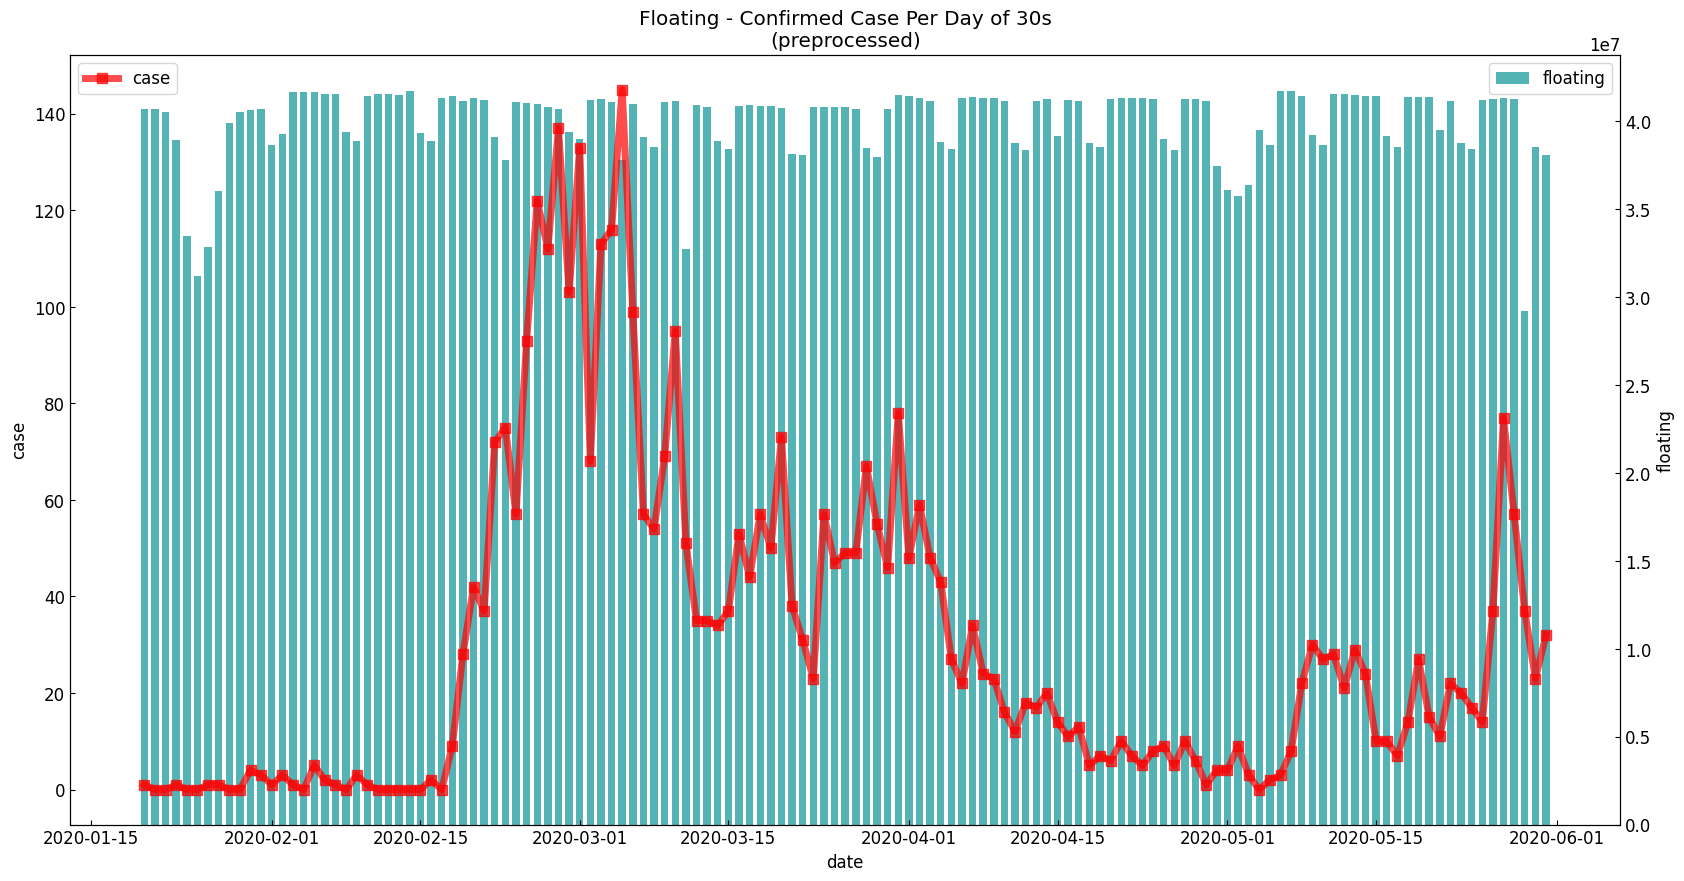

In [179]:
# 1. 기본 스타일 설정
plt.style.use('default')
plt.rcParams['figure.figsize'] = (20, 10)
plt.rcParams['font.size'] = 12

# 2. 데이터 준비
# x = twn_sum_daily[(twn_sum_daily.index >='2020-01-20') & (twn_sum_daily.index<='2020-05-31')]
# y1 = twn_sum_daily.fp_num[(twn_sum_daily.index>='2020-01-20') & (twn_sum_daily.index<='2020-05-31')]
# y2 = confirmed_case
# y2_1 = confirmed_case.astype(int)

# 3. 그래프 그리기
fig, ax1 = plt.subplots()
plt.title("""Floating - Confirmed Case Per Day of 30s\n""" """(preprocessed)""")
ax1.plot(y2_date, y22, '-s', color='red', markersize=7, linewidth=5, alpha=0.7, label='case')
ax1.set_xlabel('date')
ax1.set_ylabel('case')
ax1.tick_params(axis='both', direction='in')

ax2 = ax1.twinx()
ax2.bar(y2_date, y11, color='#0a9396', label='floating', alpha=0.7, width=0.7)
ax2.set_ylabel(r'floating')
ax2.tick_params(axis='y', direction='in')

ax1.set_zorder(ax2.get_zorder() + 10)
ax1.patch.set_visible(False)

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

In [49]:
four = SF_df[SF_df["birth_year"] == 40]
four.head()

,date,hour,birth_year,sex,province,city,fp_num
2400,2020-01-01,0,40,female,Seoul,Dobong-gu,26730
2401,2020-01-01,0,40,male,Seoul,Dobong-gu,25740
2402,2020-01-01,0,40,female,Seoul,Dongdaemun-gu,26950
2403,2020-01-01,0,40,male,Seoul,Dongdaemun-gu,28520
2404,2020-01-01,0,40,female,Seoul,Dongjag-gu,29740


In [50]:
four["date"] = pd.to_datetime(four["date"])
four = pd.DataFrame(four)
four_sum = four.groupby(['date','hour']).agg({"fp_num" : sum})
four_sum

fp_num
date       hour         
2020-01-01 0     1613790
           1     1601360
           2     1594570
           3     1589580
           4     1584650
...                  ...
2020-05-31 19    1609070
           20    1618750
           21    1627340
           22    1632320
           23    1633650

[3616 rows x 1 columns]

In [173]:
four_sum_daily = four.groupby(['date']).agg({"fp_num" : sum})
y1 = four_sum_daily.fp_num[(four_sum_daily.index>='2020-01-20') & (four_sum_daily.index<='2020-05-31')]
y11 = y1.copy()
y11.index = pd.DatetimeIndex(y11.index)
y11 = y11.reindex(y2_date, fill_value=0)

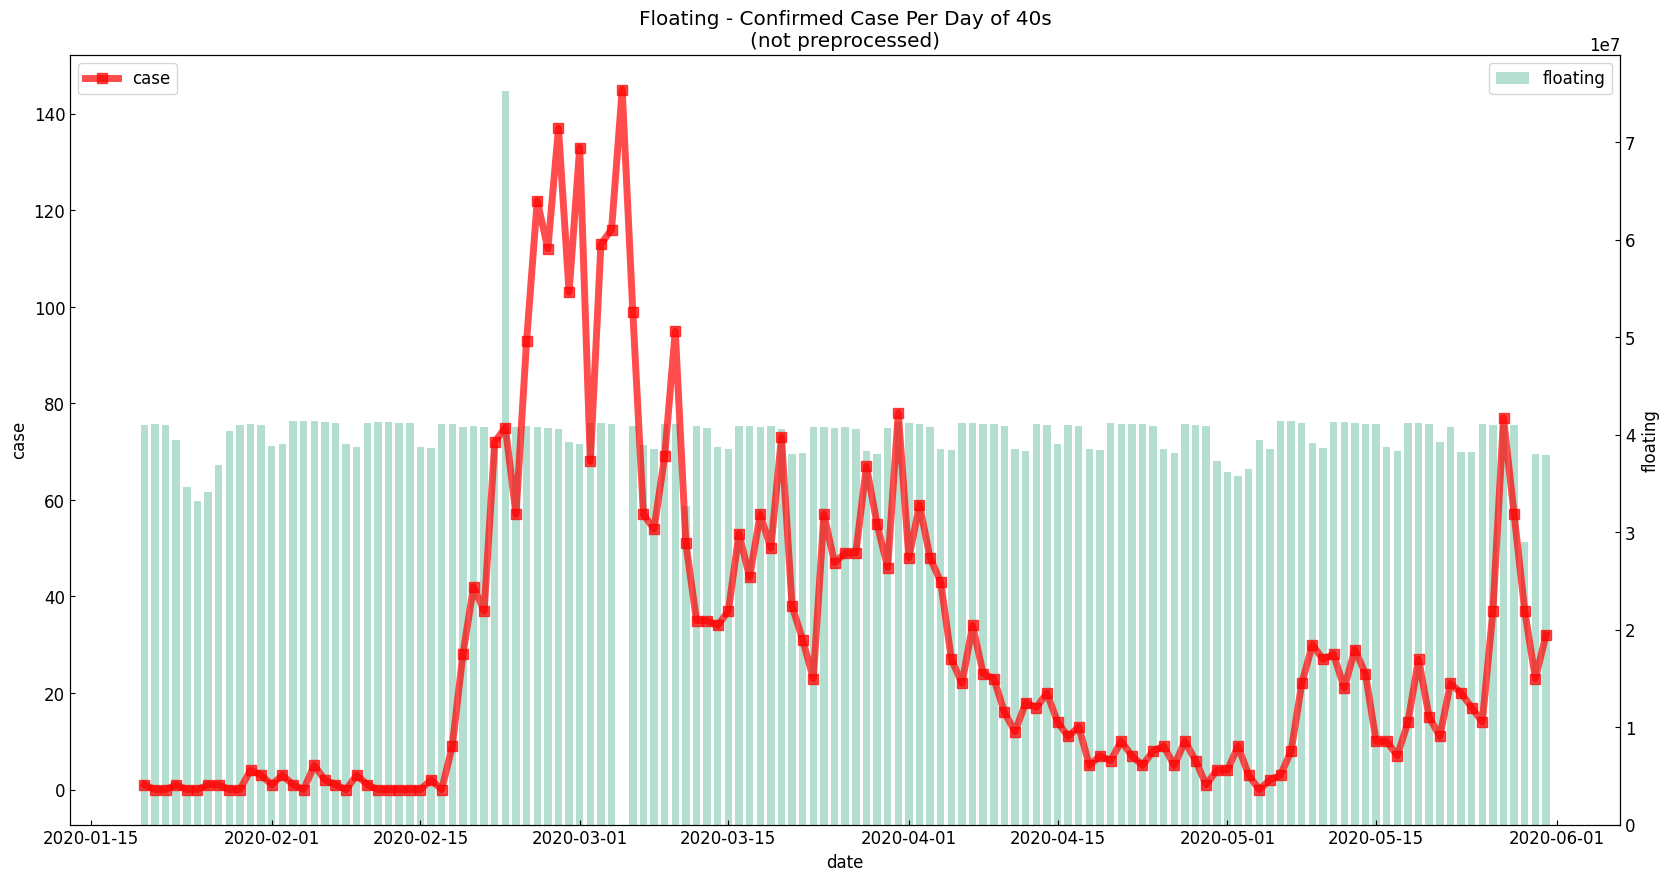

In [150]:
# 1. 기본 스타일 설정
plt.style.use('default')
plt.rcParams['figure.figsize'] = (20, 10)
plt.rcParams['font.size'] = 12

# 2. 데이터 준비
# x = twn_sum_daily[(twn_sum_daily.index >='2020-01-20') & (twn_sum_daily.index<='2020-05-31')]
# y1 = twn_sum_daily.fp_num[(twn_sum_daily.index>='2020-01-20') & (twn_sum_daily.index<='2020-05-31')]
# y2 = confirmed_case
# y2_1 = confirmed_case.astype(int)

# 3. 그래프 그리기
fig, ax1 = plt.subplots()
plt.title("""Floating - Confirmed Case Per Day of 40s\n""" """(not preprocessed)""")
ax1.plot(y2_date, y22, '-s', color='red', markersize=7, linewidth=5, alpha=0.7, label='case')
ax1.set_xlabel('date')
ax1.set_ylabel('case')
ax1.tick_params(axis='both', direction='in')

ax2 = ax1.twinx()
ax2.bar(y2_date, y11, color='#94d2bd', label='floating', alpha=0.7, width=0.7)
ax2.set_ylabel(r'floating')
ax2.tick_params(axis='y', direction='in')

ax1.set_zorder(ax2.get_zorder() + 10)
ax1.patch.set_visible(False)

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

In [174]:
y11.loc["2020-02-23"] = y11.loc["2020-02-23"] //2
y11.loc["2020-03-05"] = y11.loc["2020-02-23"] 

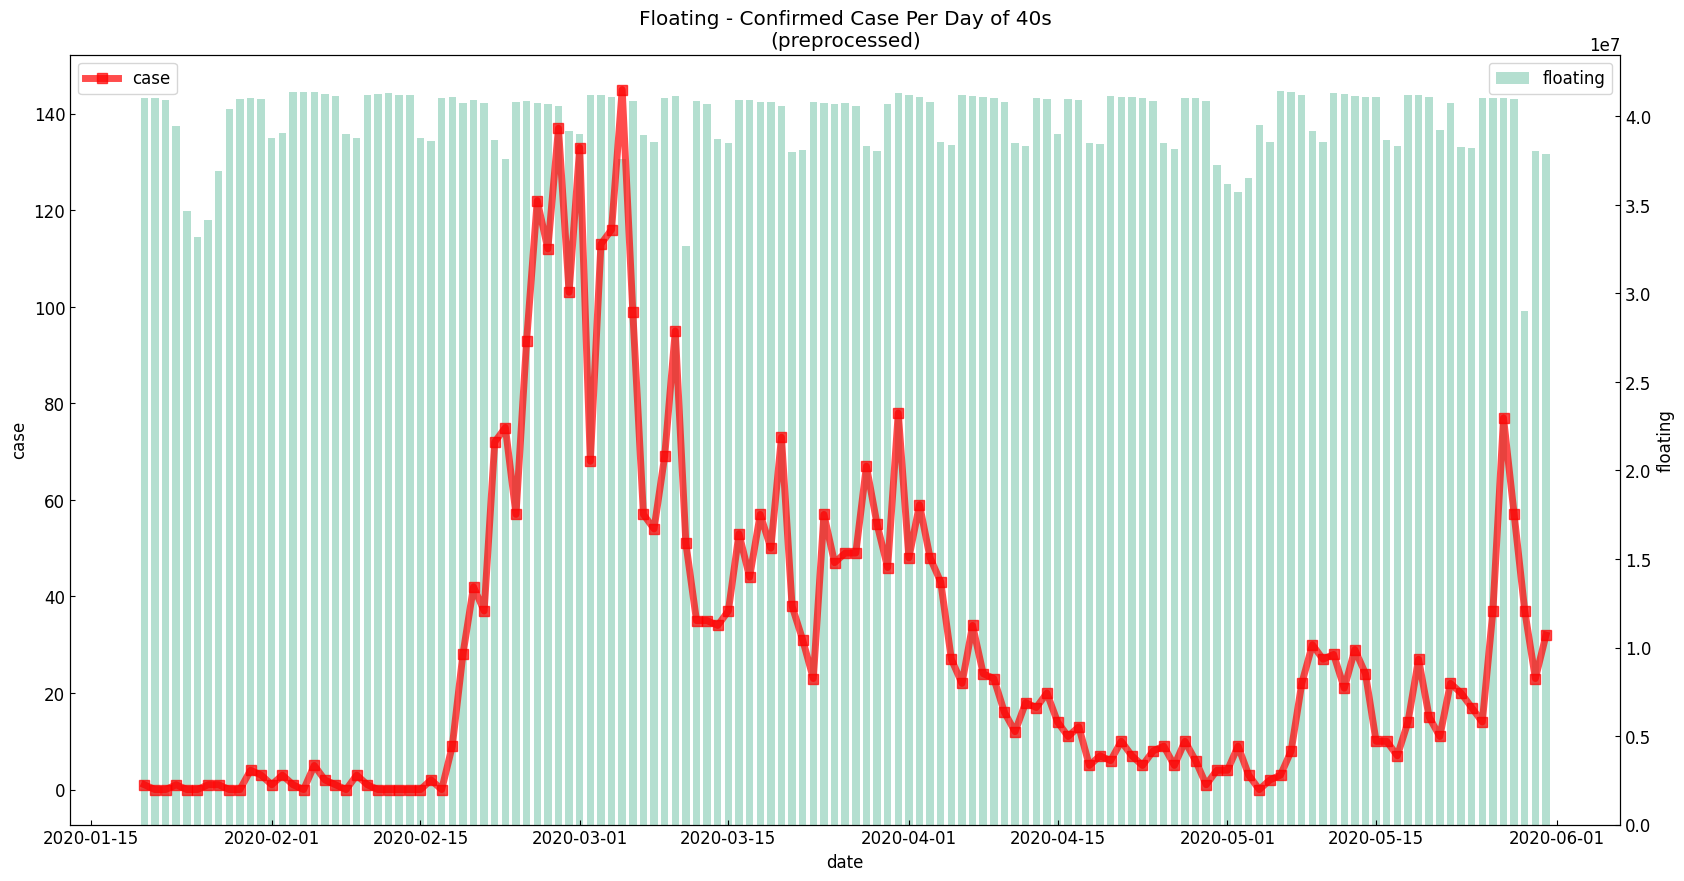

In [175]:
# 1. 기본 스타일 설정
plt.style.use('default')
plt.rcParams['figure.figsize'] = (20, 10)
plt.rcParams['font.size'] = 12

# 2. 데이터 준비
# x = twn_sum_daily[(twn_sum_daily.index >='2020-01-20') & (twn_sum_daily.index<='2020-05-31')]
# y1 = twn_sum_daily.fp_num[(twn_sum_daily.index>='2020-01-20') & (twn_sum_daily.index<='2020-05-31')]
# y2 = confirmed_case
# y2_1 = confirmed_case.astype(int)

# 3. 그래프 그리기
fig, ax1 = plt.subplots()
plt.title("""Floating - Confirmed Case Per Day of 40s\n""" """(preprocessed)""")
ax1.plot(y2_date, y22, '-s', color='red', markersize=7, linewidth=5, alpha=0.7, label='case')
ax1.set_xlabel('date')
ax1.set_ylabel('case')
ax1.tick_params(axis='both', direction='in')

ax2 = ax1.twinx()
ax2.bar(y2_date, y11, color='#94d2bd', label='floating', alpha=0.7, width=0.7)
ax2.set_ylabel(r'floating')
ax2.tick_params(axis='y', direction='in')

ax1.set_zorder(ax2.get_zorder() + 10)
ax1.patch.set_visible(False)

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

In [53]:
fth = SF_df[SF_df["birth_year"] == 50]
fth.head()

,date,hour,birth_year,sex,province,city,fp_num
3600,2020-01-01,0,50,female,Seoul,Dobong-gu,29070
3601,2020-01-01,0,50,male,Seoul,Dobong-gu,26340
3602,2020-01-01,0,50,female,Seoul,Dongdaemun-gu,27960
3603,2020-01-01,0,50,male,Seoul,Dongdaemun-gu,27060
3604,2020-01-01,0,50,female,Seoul,Dongjag-gu,30860


In [54]:
fth["date"] = pd.to_datetime(fth["date"])
fth = pd.DataFrame(fth)
fth_sum = fth.groupby(['date','hour']).agg({"fp_num" : sum})
fth_sum

fp_num
date       hour         
2020-01-01 0     1549250
           1     1539210
           2     1532890
           3     1527880
           4     1522580
...                  ...
2020-05-31 19    1531480
           20    1545400
           21    1556600
           22    1561780
           23    1562500

[3616 rows x 1 columns]

In [170]:
fth_sum_daily = fth.groupby(['date']).agg({"fp_num" : sum})
y1 = fth_sum_daily.fp_num[(fth_sum_daily.index>='2020-01-20') & (fth_sum_daily.index<='2020-05-31')]
y11 = y1.copy()
y11.index = pd.DatetimeIndex(y11.index)
y11 = y11.reindex(y2_date, fill_value=0)

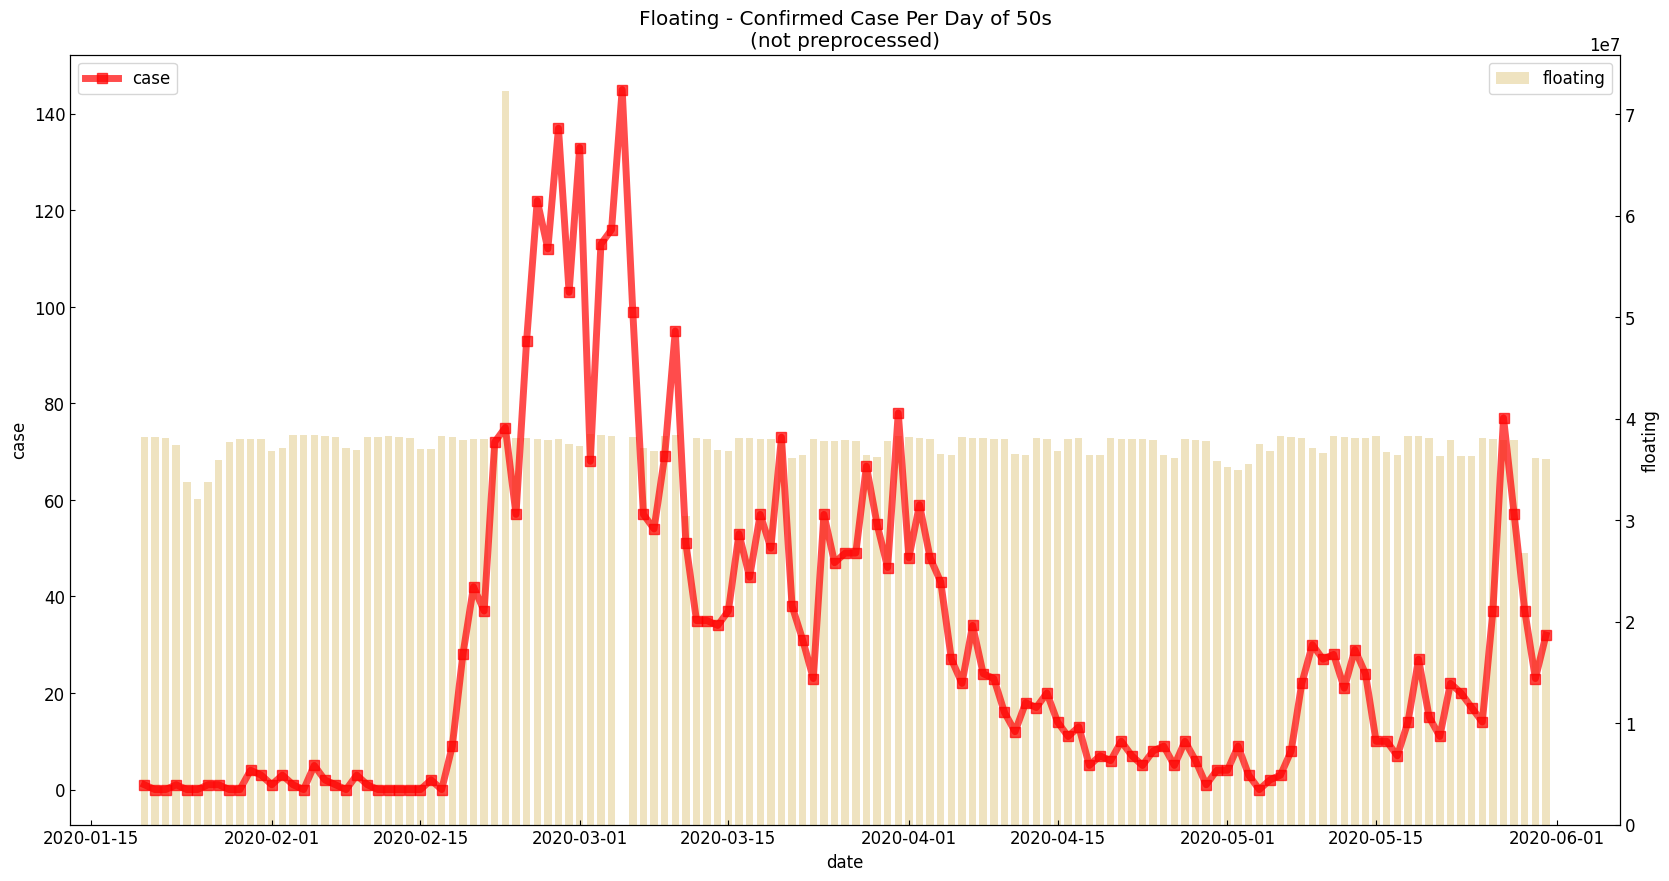

In [156]:
# 1. 기본 스타일 설정
plt.style.use('default')
plt.rcParams['figure.figsize'] = (20, 10)
plt.rcParams['font.size'] = 12

# 2. 데이터 준비
# x = twn_sum_daily[(twn_sum_daily.index >='2020-01-20') & (twn_sum_daily.index<='2020-05-31')]
# y1 = twn_sum_daily.fp_num[(twn_sum_daily.index>='2020-01-20') & (twn_sum_daily.index<='2020-05-31')]
# y2 = confirmed_case
# y2_1 = confirmed_case.astype(int)

# 3. 그래프 그리기
fig, ax1 = plt.subplots()
plt.title("""Floating - Confirmed Case Per Day of 50s\n""" """(not preprocessed)""")
ax1.plot(y2_date, y22, '-s', color='red', markersize=7, linewidth=5, alpha=0.7, label='case')
ax1.set_xlabel('date')
ax1.set_ylabel('case')
ax1.tick_params(axis='both', direction='in')

ax2 = ax1.twinx()
ax2.bar(y2_date, y11, color='#e9d8a6', label='floating', alpha=0.7, width=0.7)
ax2.set_ylabel(r'floating')
ax2.tick_params(axis='y', direction='in')

ax1.set_zorder(ax2.get_zorder() + 10)
ax1.patch.set_visible(False)

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

In [171]:
y11.loc["2020-02-23"] = y11.loc["2020-02-23"] //2
y11.loc["2020-03-05"] = y11.loc["2020-02-23"] 

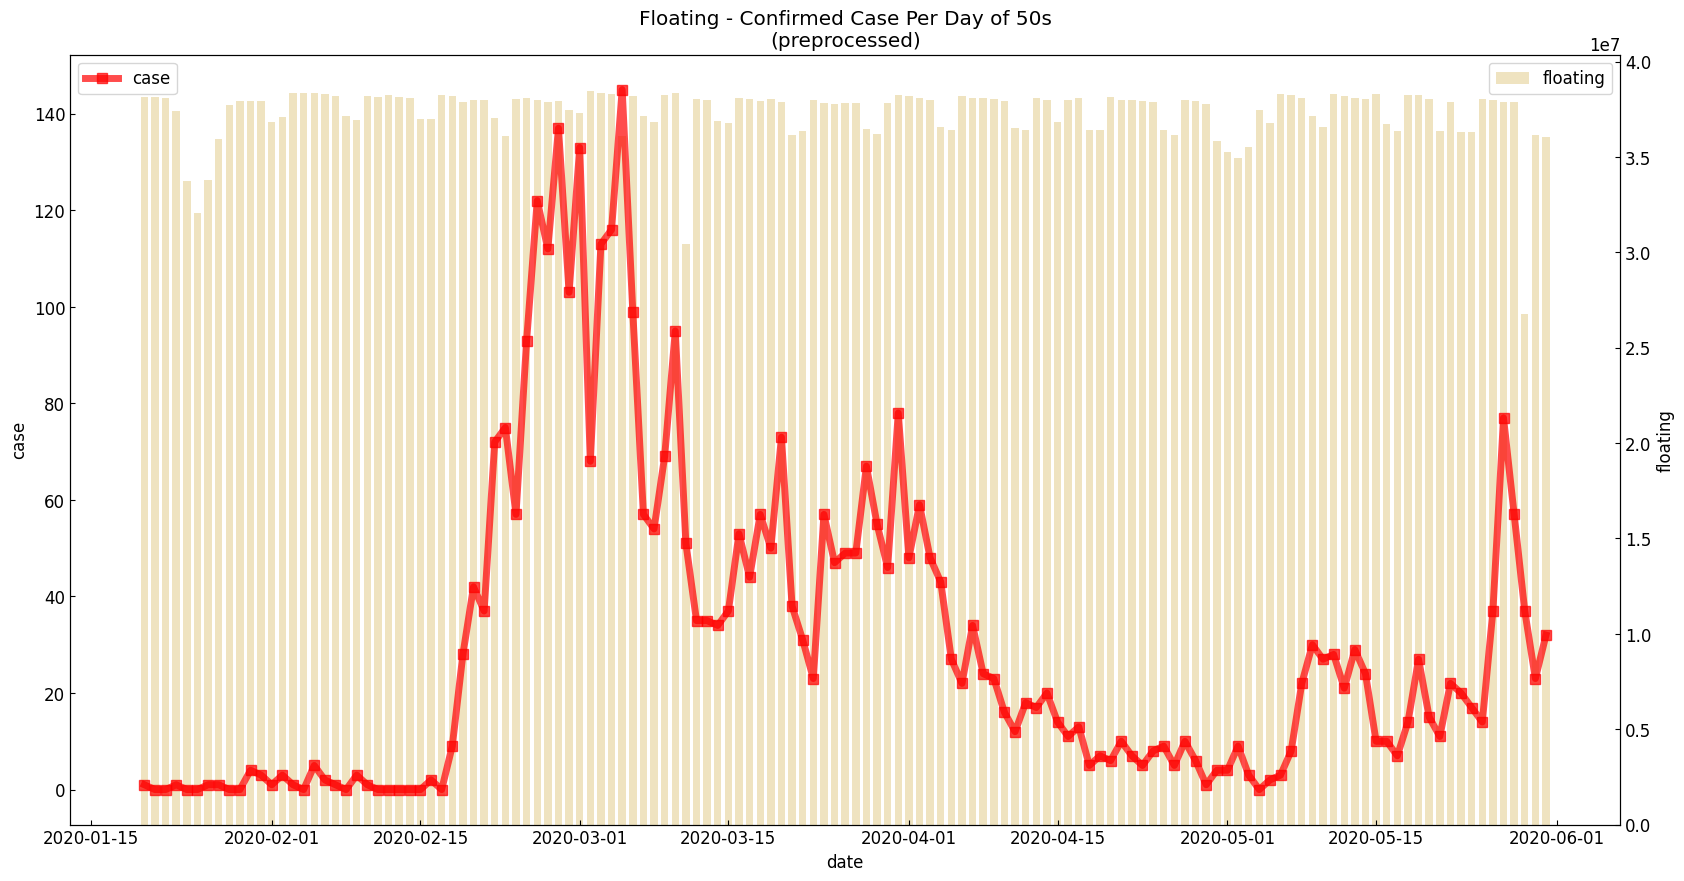

In [172]:
# 1. 기본 스타일 설정
plt.style.use('default')
plt.rcParams['figure.figsize'] = (20, 10)
plt.rcParams['font.size'] = 12

# 2. 데이터 준비
# x = twn_sum_daily[(twn_sum_daily.index >='2020-01-20') & (twn_sum_daily.index<='2020-05-31')]
# y1 = twn_sum_daily.fp_num[(twn_sum_daily.index>='2020-01-20') & (twn_sum_daily.index<='2020-05-31')]
# y2 = confirmed_case
# y2_1 = confirmed_case.astype(int)

# 3. 그래프 그리기
fig, ax1 = plt.subplots()
plt.title("""Floating - Confirmed Case Per Day of 50s\n""" """(preprocessed)""")
ax1.plot(y2_date, y22, '-s', color='red', markersize=7, linewidth=5, alpha=0.7, label='case')
ax1.set_xlabel('date')
ax1.set_ylabel('case')
ax1.tick_params(axis='both', direction='in')

ax2 = ax1.twinx()
ax2.bar(y2_date, y11, color='#e9d8a6', label='floating', alpha=0.7, width=0.7)
ax2.set_ylabel(r'floating')
ax2.tick_params(axis='y', direction='in')

ax1.set_zorder(ax2.get_zorder() + 10)
ax1.patch.set_visible(False)

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

In [57]:
sth = SF_df[SF_df["birth_year"] == 60]
sth.head()

,date,hour,birth_year,sex,province,city,fp_num
4800,2020-01-01,0,60,female,Seoul,Dobong-gu,20550
4801,2020-01-01,0,60,male,Seoul,Dobong-gu,19080
4802,2020-01-01,0,60,female,Seoul,Dongdaemun-gu,21880
4803,2020-01-01,0,60,male,Seoul,Dongdaemun-gu,19820
4804,2020-01-01,0,60,female,Seoul,Dongjag-gu,23650


In [58]:
sth["date"] = pd.to_datetime(sth["date"])
sth = pd.DataFrame(sth)
sth_sum = sth.groupby(['date','hour']).agg({"fp_num" : sum})
sth_sum

fp_num
date       hour         
2020-01-01 0     1095570
           1     1087780
           2     1083490
           3     1079270
           4     1075200
...                  ...
2020-05-31 19     990880
           20     999050
           21    1004880
           22    1007730
           23    1007930

[3616 rows x 1 columns]

In [160]:
sth_sum_daily = sth.groupby(['date']).agg({"fp_num" : sum})
y1 = sth_sum_daily.fp_num[(sth_sum_daily.index>='2020-01-20') & (sth_sum_daily.index<='2020-05-31')]
y11 = y1.copy()
y11.index = pd.DatetimeIndex(y11.index)
y11 = y11.reindex(y2_date, fill_value=0)

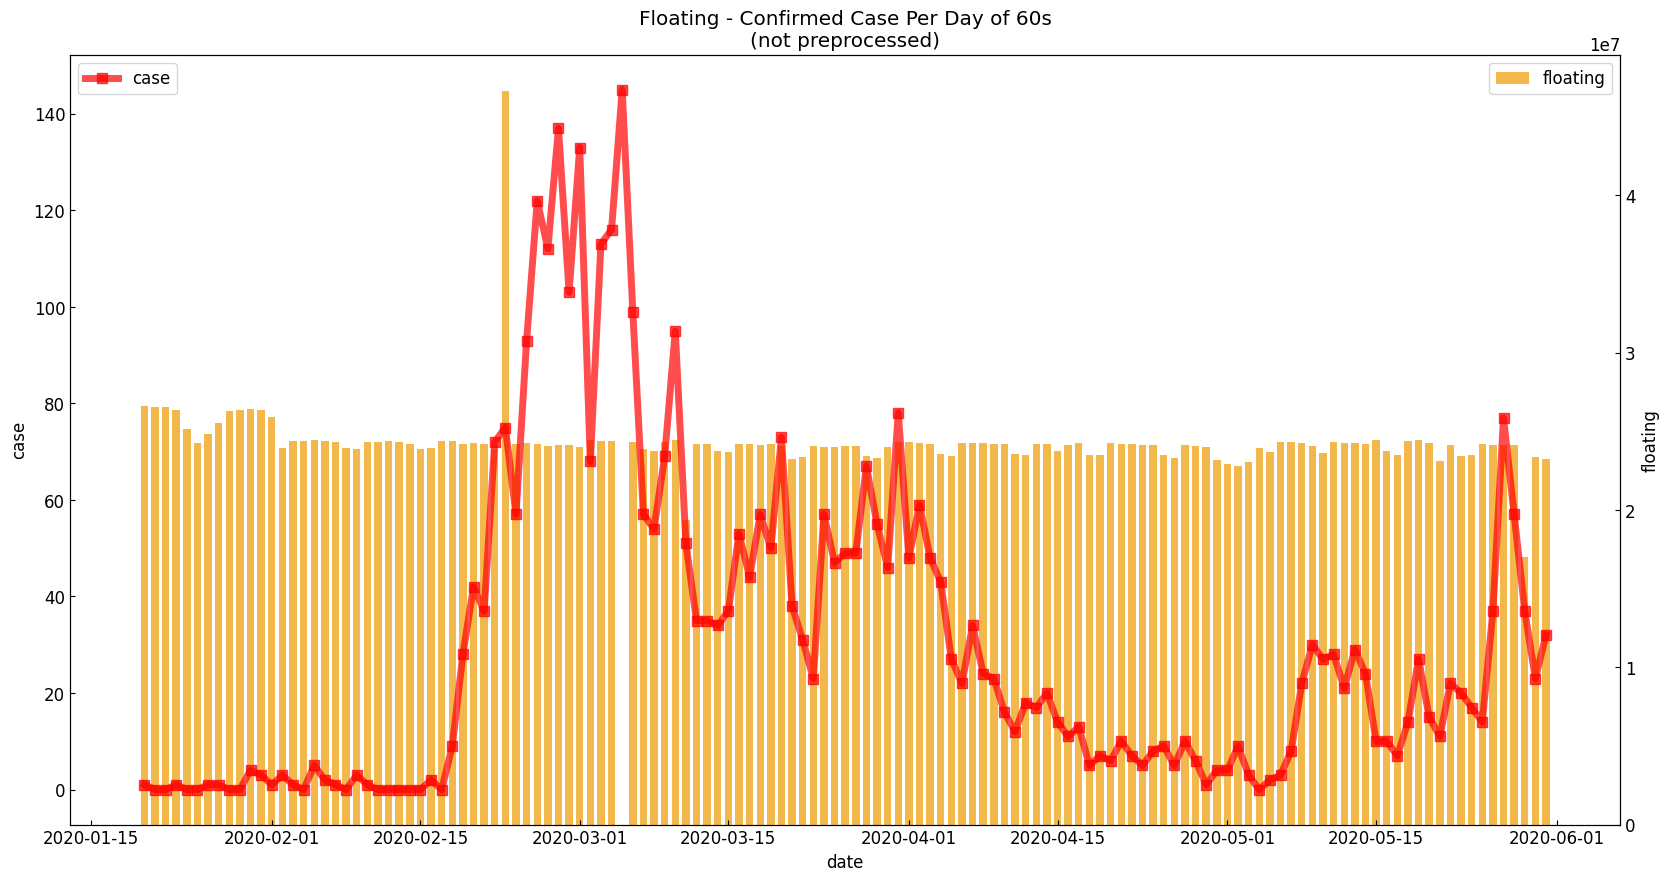

In [161]:
# 1. 기본 스타일 설정
plt.style.use('default')
plt.rcParams['figure.figsize'] = (20, 10)
plt.rcParams['font.size'] = 12

# 2. 데이터 준비
# x = twn_sum_daily[(twn_sum_daily.index >='2020-01-20') & (twn_sum_daily.index<='2020-05-31')]
# y1 = twn_sum_daily.fp_num[(twn_sum_daily.index>='2020-01-20') & (twn_sum_daily.index<='2020-05-31')]
# y2 = confirmed_case
# y2_1 = confirmed_case.astype(int)

# 3. 그래프 그리기
fig, ax1 = plt.subplots()
plt.title("""Floating - Confirmed Case Per Day of 60s\n""" """(not preprocessed)""")
ax1.plot(y2_date, y22, '-s', color='red', markersize=7, linewidth=5, alpha=0.7, label='case')
ax1.set_xlabel('date')
ax1.set_ylabel('case')
ax1.tick_params(axis='both', direction='in')

ax2 = ax1.twinx()
ax2.bar(y2_date, y11, color='#ee9b00', label='floating', alpha=0.7, width=0.7)
ax2.set_ylabel(r'floating')
ax2.tick_params(axis='y', direction='in')

ax1.set_zorder(ax2.get_zorder() + 10)
ax1.patch.set_visible(False)

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

In [162]:
y11.loc["2020-02-23"] = y11.loc["2020-02-23"] //2
y11.loc["2020-03-05"] = y11.loc["2020-02-23"] 

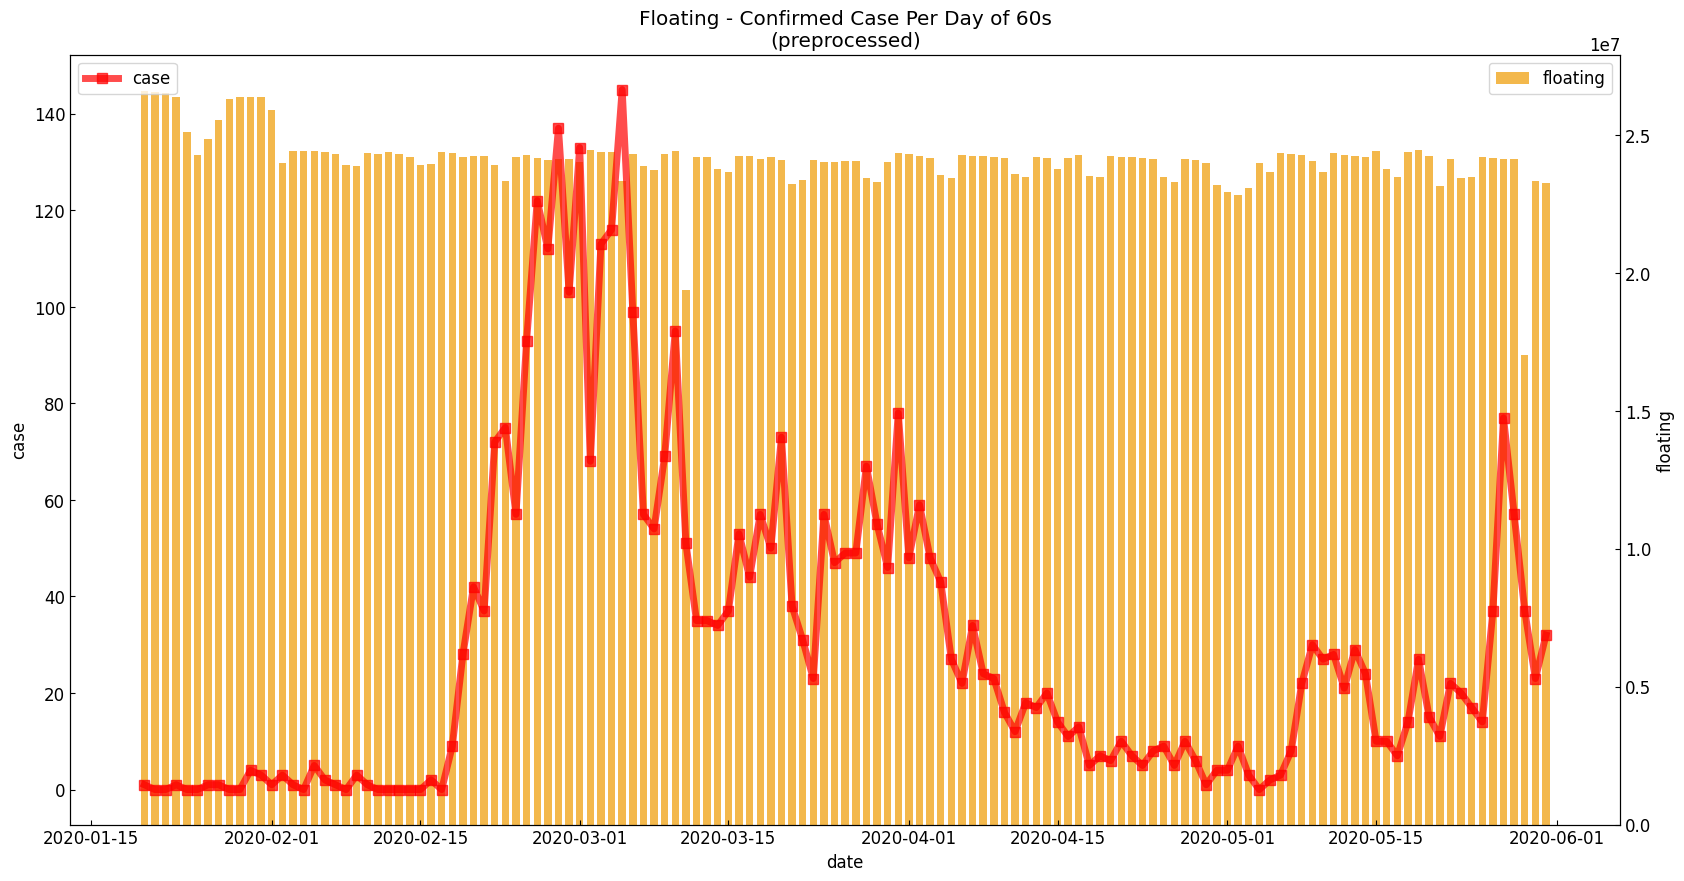

In [163]:
# 1. 기본 스타일 설정
plt.style.use('default')
plt.rcParams['figure.figsize'] = (20, 10)
plt.rcParams['font.size'] = 12

# 2. 데이터 준비
# x = twn_sum_daily[(twn_sum_daily.index >='2020-01-20') & (twn_sum_daily.index<='2020-05-31')]
# y1 = twn_sum_daily.fp_num[(twn_sum_daily.index>='2020-01-20') & (twn_sum_daily.index<='2020-05-31')]
# y2 = confirmed_case
# y2_1 = confirmed_case.astype(int)

# 3. 그래프 그리기
fig, ax1 = plt.subplots()
plt.title("""Floating - Confirmed Case Per Day of 60s\n""" """(preprocessed)""")
ax1.plot(y2_date, y22, '-s', color='red', markersize=7, linewidth=5, alpha=0.7, label='case')
ax1.set_xlabel('date')
ax1.set_ylabel('case')
ax1.tick_params(axis='both', direction='in')

ax2 = ax1.twinx()
ax2.bar(y2_date, y11, color='#ee9b00', label='floating', alpha=0.7, width=0.7)
ax2.set_ylabel(r'floating')
ax2.tick_params(axis='y', direction='in')

ax1.set_zorder(ax2.get_zorder() + 10)
ax1.patch.set_visible(False)

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

In [61]:
svt = SF_df[SF_df["birth_year"] == 70]
svt.head()

,date,hour,birth_year,sex,province,city,fp_num
6000,2020-01-01,0,70,female,Seoul,Dobong-gu,18690
6001,2020-01-01,0,70,male,Seoul,Dobong-gu,13860
6002,2020-01-01,0,70,female,Seoul,Dongdaemun-gu,20180
6003,2020-01-01,0,70,male,Seoul,Dongdaemun-gu,15020
6004,2020-01-01,0,70,female,Seoul,Dongjag-gu,20290


In [62]:
svt["date"] = pd.to_datetime(svt["date"])
svt = pd.DataFrame(svt)
svt_sum = svt.groupby(['date','hour']).agg({"fp_num" : sum})
svt_sum

fp_num
date       hour        
2020-01-01 0     841100
           1     834980
           2     831620
           3     827660
           4     824320
...                 ...
2020-05-31 19    748830
           20    750760
           21    751840
           22    752350
           23    752140

[3616 rows x 1 columns]

In [166]:
svt_sum_daily = svt.groupby(['date']).agg({"fp_num" : sum})
y1 = svt_sum_daily.fp_num[(svt_sum_daily.index>='2020-01-20') & (svt_sum_daily.index<='2020-05-31')]
y11 = y1.copy()
y11.index = pd.DatetimeIndex(y11.index)
y11 = y11.reindex(y2_date, fill_value=0)

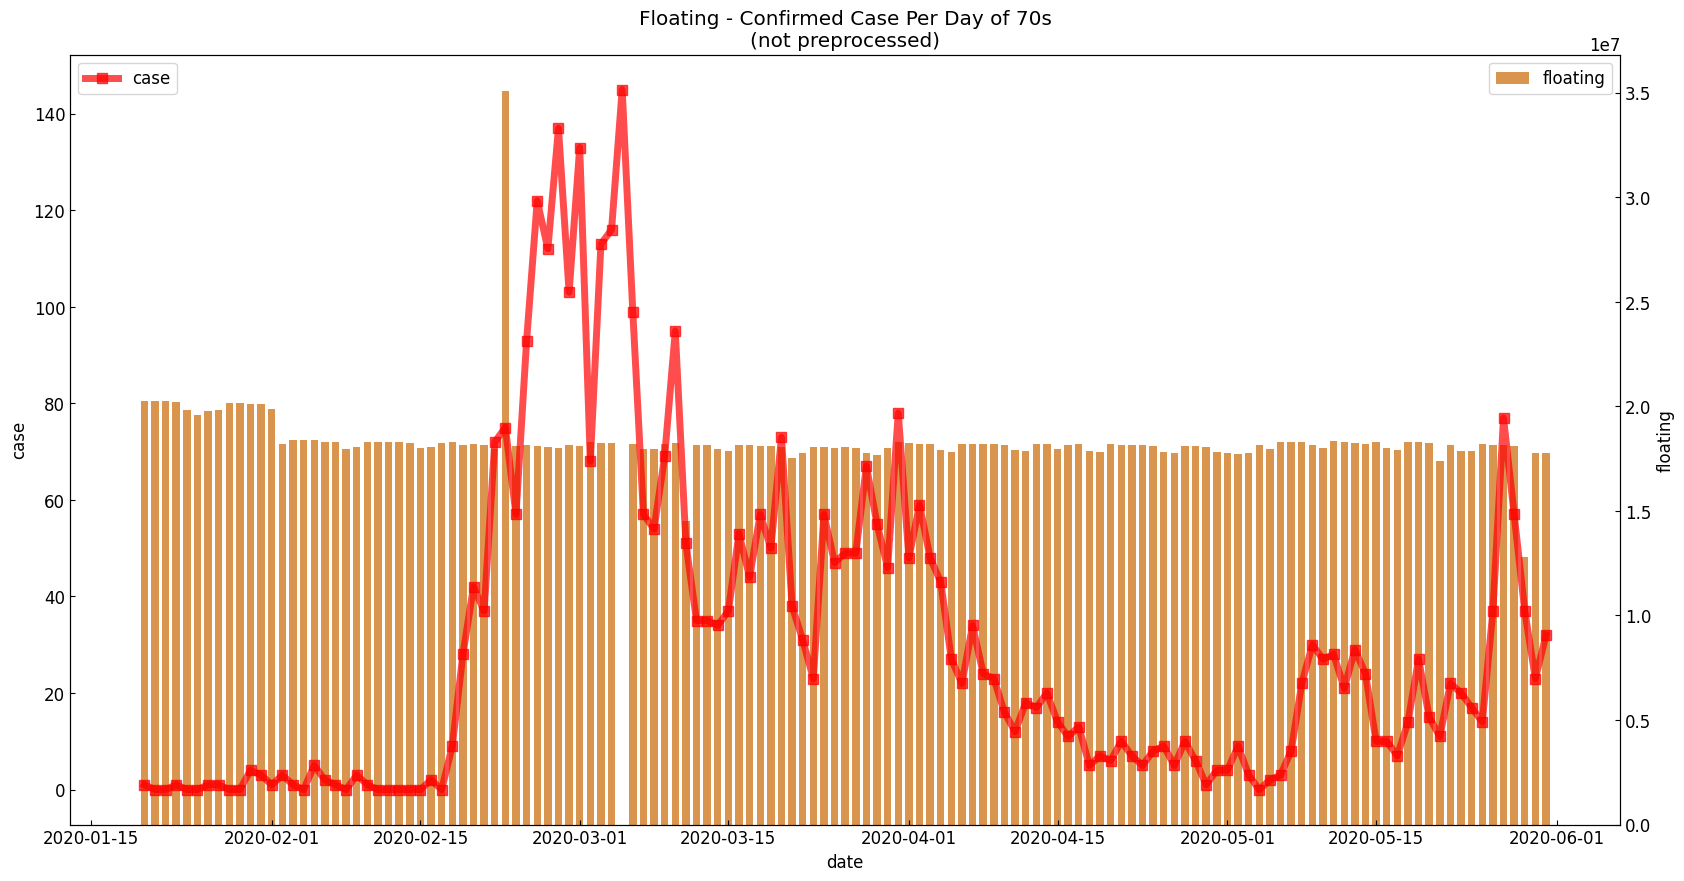

In [167]:
# 1. 기본 스타일 설정
plt.style.use('default')
plt.rcParams['figure.figsize'] = (20, 10)
plt.rcParams['font.size'] = 12
# 2. 데이터 준비
# x = twn_sum_daily[(twn_sum_daily.index >='2020-01-20') & (twn_sum_daily.index<='2020-05-31')]
# y1 = twn_sum_daily.fp_num[(twn_sum_daily.index>='2020-01-20') & (twn_sum_daily.index<='2020-05-31')]
# y2 = confirmed_case
# y2_1 = confirmed_case.astype(int)

# 3. 그래프 그리기
fig, ax1 = plt.subplots()
plt.title("""Floating - Confirmed Case Per Day of 70s\n""" """(not preprocessed)""")
ax1.plot(y2_date, y22, '-s', color='red', markersize=7, linewidth=5, alpha=0.7, label='case')
ax1.set_xlabel('date')
ax1.set_ylabel('case')
ax1.tick_params(axis='both', direction='in')

ax2 = ax1.twinx()
ax2.bar(y2_date, y11, color='#ca6702', label='floating', alpha=0.7, width=0.7)
ax2.set_ylabel(r'floating')
ax2.tick_params(axis='y', direction='in')

ax1.set_zorder(ax2.get_zorder() + 10)
ax1.patch.set_visible(False)

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

In [168]:
y11.loc["2020-02-23"] = y11.loc["2020-02-23"] //2
y11.loc["2020-03-05"] = y11.loc["2020-02-23"] 

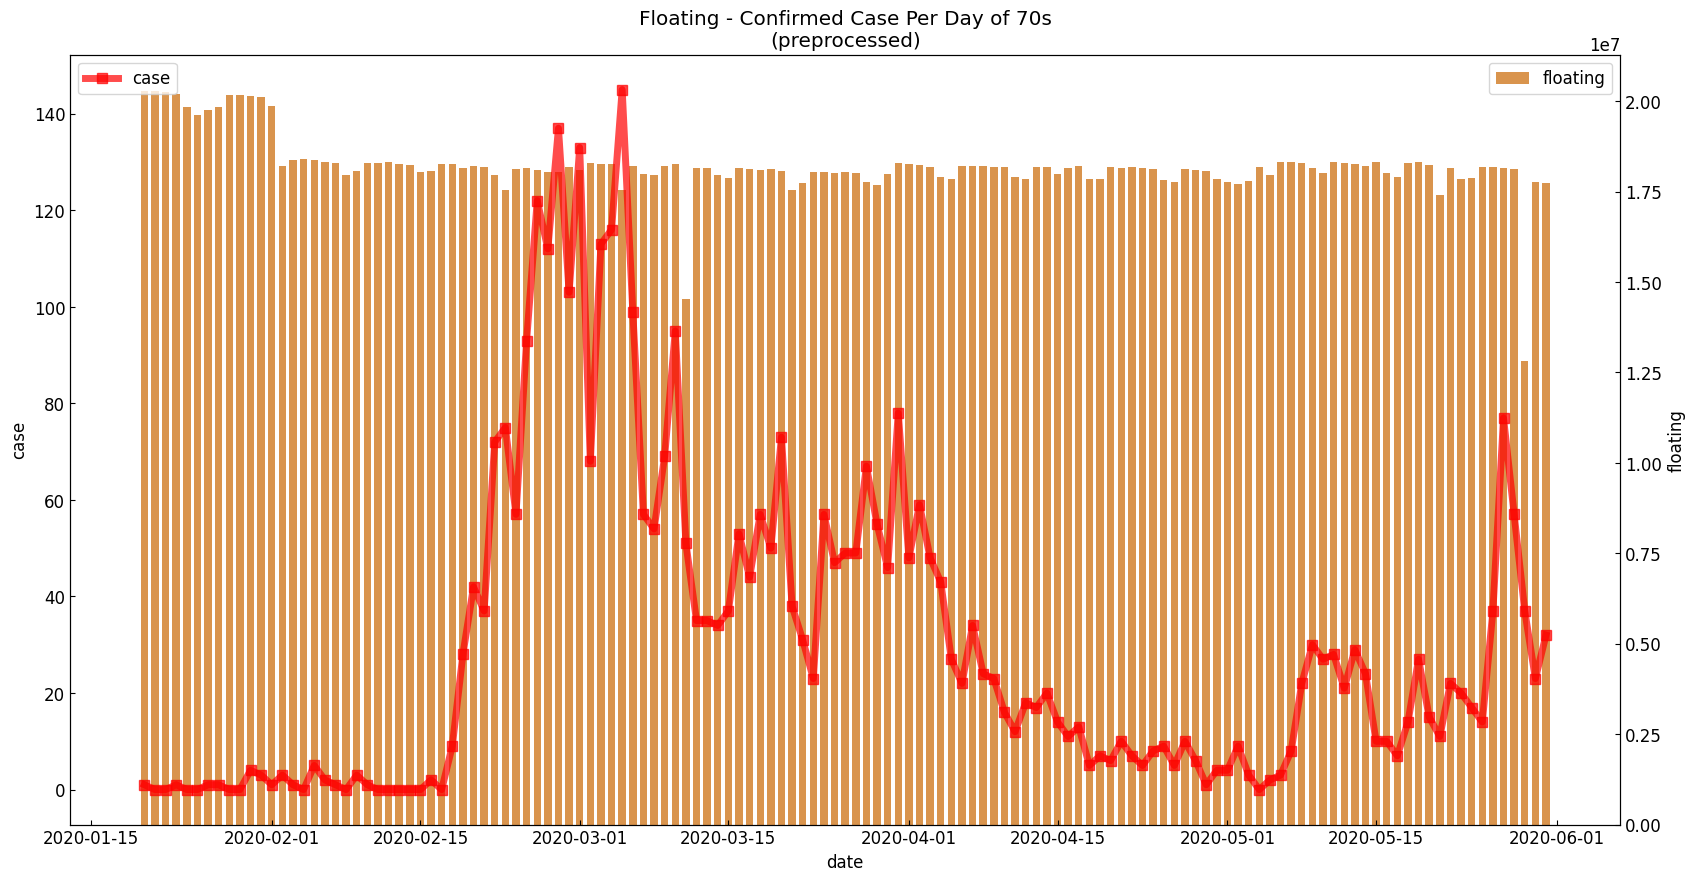

In [169]:
# 1. 기본 스타일 설정
plt.style.use('default')
plt.rcParams['figure.figsize'] = (20, 10)
plt.rcParams['font.size'] = 12
# 2. 데이터 준비
# x = twn_sum_daily[(twn_sum_daily.index >='2020-01-20') & (twn_sum_daily.index<='2020-05-31')]
# y1 = twn_sum_daily.fp_num[(twn_sum_daily.index>='2020-01-20') & (twn_sum_daily.index<='2020-05-31')]
# y2 = confirmed_case
# y2_1 = confirmed_case.astype(int)

# 3. 그래프 그리기
fig, ax1 = plt.subplots()
plt.title("""Floating - Confirmed Case Per Day of 70s\n""" """(preprocessed)""")
ax1.plot(y2_date, y22, '-s', color='red', markersize=7, linewidth=5, alpha=0.7, label='case')
ax1.set_xlabel('date')
ax1.set_ylabel('case')
ax1.tick_params(axis='both', direction='in')

ax2 = ax1.twinx()
ax2.bar(y2_date, y11, color='#ca6702', label='floating', alpha=0.7, width=0.7)
ax2.set_ylabel(r'floating')
ax2.tick_params(axis='y', direction='in')

ax1.set_zorder(ax2.get_zorder() + 10)
ax1.patch.set_visible(False)

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

In [65]:
eld = svt.groupby(['date','hour']).agg({"fp_num" : sum}) + sth.groupby(['date','hour']).agg({"fp_num" : sum})
eld

fp_num
date       hour         
2020-01-01 0     1936670
           1     1922760
           2     1915110
           3     1906930
           4     1899520
...                  ...
2020-05-31 19    1739710
           20    1749810
           21    1756720
           22    1760080
           23    1760070

[3616 rows x 1 columns]

In [66]:
mid = fth.groupby(['date','hour']).agg({"fp_num" : sum}) + four.groupby(['date','hour']).agg({"fp_num" : sum})
mid

fp_num
date       hour         
2020-01-01 0     3163040
           1     3140570
           2     3127460
           3     3117460
           4     3107230
...                  ...
2020-05-31 19    3140550
           20    3164150
           21    3183940
           22    3194100
           23    3196150

[3616 rows x 1 columns]

In [67]:
fre = twn.groupby(['date','hour']).agg({"fp_num" : sum}) + thr.groupby(['date','hour']).agg({"fp_num" : sum})
fre

fp_num
date       hour         
2020-01-01 0     3031750
           1     3004680
           2     2987580
           3     2972820
           4     2963050
...                  ...
2020-05-31 19    3115940
           20    3120990
           21    3118000
           22    3109010
           23    3096510

[3616 rows x 1 columns]

In [68]:
week_date = SF_df.copy()
week_date["date"] = pd.to_datetime(week_date["date"])
week_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1084800 entries, 0 to 1084799
Data columns (total 7 columns):
 #   Column      Non-Null Count    Dtype         
---  ------      --------------    -----         
 0   date        1084800 non-null  datetime64[ns]
 1   hour        1084800 non-null  int64         
 2   birth_year  1084800 non-null  int64         
 3   sex         1084800 non-null  object        
 4   province    1084800 non-null  object        
 5   city        1084800 non-null  object        
 6   fp_num      1084800 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 57.9+ MB


In [69]:
week_date.groupby(week_date['date'].dt.strftime("%W")).sum()

,hour,birth_year,fp_num
date,,,
00,414000,1620000,991816400
01,579600,2268000,1412750590
02,579600,2268000,1408781130
03,579600,2268000,1323341710
04,579600,2268000,1381499610
05,579600,2268000,1387818200
06,579600,2268000,1385614380
07,579600,2268000,1561186800
08,579600,2268000,1375153010


In [70]:
week_date.head()

,date,hour,birth_year,sex,province,city,fp_num
0,2020-01-01,0,20,female,Seoul,Dobong-gu,19140
1,2020-01-01,0,20,male,Seoul,Dobong-gu,19950
2,2020-01-01,0,20,female,Seoul,Dongdaemun-gu,25450
3,2020-01-01,0,20,male,Seoul,Dongdaemun-gu,27050
4,2020-01-01,0,20,female,Seoul,Dongjag-gu,28880


In [71]:
# plt.figure(figsize=(40,20)) 
# plt.scatter(SF_df['date'],floating2['hour'],s=100*floating2['fp_num'],c=floating2['birth_year'],cmap=plt.cm.get_cmap('prism', floating2['birth_year'].nunique()),edgecolors='black')
# plt.xlabel('date')
# plt.ylabel('hour')
# cb=plt.colorbar(label='move')
# cb.set_ticks([0,1,2,4,5,6])
# cb.set_ticklabels(["20","30","40","50","60","70"])
# plt.show()

# Patient info

In [72]:
# patient_data_path = join(data_dir, 'PatientInfo.csv')

# patient = pd.read_csv(patient_data_path)
# patient.info()
# patient=pd.DataFrame(patient)

In [73]:
PI_df[PI_df['confirmed_date'].isnull()]

,patient_id,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
4730,6011000051,female,40s,Korea,Gyeongsangbuk-do,Andong-si,etc,NaN,NaN,NaN,NaN,NaN,NaN,released
4731,6011000052,female,0s,Korea,Gyeongsangbuk-do,Andong-si,etc,NaN,NaN,NaN,NaN,NaN,NaN,released
4732,6011000053,female,10s,Korea,Gyeongsangbuk-do,Andong-si,etc,NaN,NaN,2020-04-15,NaN,NaN,NaN,released


In [74]:
PI_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5165 entries, 0 to 5164
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   patient_id          5165 non-null   int64 
 1   sex                 4043 non-null   object
 2   age                 3785 non-null   object
 3   country             5165 non-null   object
 4   province            5165 non-null   object
 5   city                5071 non-null   object
 6   infection_case      4246 non-null   object
 7   infected_by         1346 non-null   object
 8   contact_number      791 non-null    object
 9   symptom_onset_date  690 non-null    object
 10  confirmed_date      5162 non-null   object
 11  released_date       1587 non-null   object
 12  deceased_date       66 non-null     object
 13  state               5165 non-null   object
dtypes: int64(1), object(13)
memory usage: 565.0+ KB


In [75]:
# PI_df = PI_df.drop(axis = 0,index = [4730,4731,4732])
# patient[patient['confirmed_date'].isnull()]

In [76]:
# PI_df["confirmed_date"] = pd.to_datetime(PI_df["confirmed_date"])
# days = PI_df["confirmed_date"].dt.day

In [77]:
# PI_df["confirmed_date"]= pd.to_datetime(PI_df["confirmed_date"])

In [78]:
death = PI_df.iloc[:,[2,4,13]]
death.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5165 entries, 0 to 5164
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       3785 non-null   object
 1   province  5165 non-null   object
 2   state     5165 non-null   object
dtypes: object(3)
memory usage: 121.2+ KB


In [79]:
death.loc[death.state == 'deceased']

,age,province,state
12,80s,Seoul,deceased
108,90s,Seoul,deceased
284,40s,Seoul,deceased
472,60s,Seoul,deceased
996,NaN,Seoul,deceased
...,...,...,...
4903,60s,Gyeongsangbuk-do,deceased
4904,50s,Gyeongsangbuk-do,deceased
4905,60s,Gyeongsangbuk-do,deceased
4906,50s,Gyeongsangbuk-do,deceased


In [80]:
death_nnull = PI_df.iloc[:,[2,4,13]]
death_nnull[death_nnull['age'].isnull()]

,age,province,state
563,NaN,Seoul,released
564,NaN,Seoul,released
565,NaN,Seoul,released
566,NaN,Seoul,released
567,NaN,Seoul,released
...,...,...,...
5142,NaN,Gyeongsangnam-do,released
5161,NaN,Jeju-do,released
5162,NaN,Jeju-do,isolated
5163,NaN,Jeju-do,isolated


In [81]:
death_nnull = death_nnull.dropna()
death_nnull.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3785 entries, 0 to 5160
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       3785 non-null   object
 1   province  3785 non-null   object
 2   state     3785 non-null   object
dtypes: object(3)
memory usage: 118.3+ KB


In [82]:
per_age = death_nnull.loc[death_nnull.state == 'deceased']
per_age

,age,province,state
12,80s,Seoul,deceased
108,90s,Seoul,deceased
284,40s,Seoul,deceased
472,60s,Seoul,deceased
1382,70s,Busan,deceased
...,...,...,...
4903,60s,Gyeongsangbuk-do,deceased
4904,50s,Gyeongsangbuk-do,deceased
4905,60s,Gyeongsangbuk-do,deceased
4906,50s,Gyeongsangbuk-do,deceased


In [83]:
age = per_age["age"]
age_list = age.to_list()
type(age_list)

list

In [84]:
cnt = 0
for i in age_list:
    age_list[cnt] = i[:-1]  
    cnt+=1
age_list[:5]

['80', '90', '40', '60', '70']

In [85]:
per_age = per_age.drop(['age'], axis=1)
per_age.columns

Index(['province', 'state'], dtype='object')

In [86]:
per_age["age"] = age_list
per_age.head()

,province,state,age
12,Seoul,deceased,80
108,Seoul,deceased,90
284,Seoul,deceased,40
472,Seoul,deceased,60
1382,Busan,deceased,70


In [87]:
age_sum = per_age.groupby(['age']).state.count()
age_sum.to_list()
type(age_sum)
age_sum

age
30     1
40     2
50     7
60    12
70    21
80    25
90     7
Name: state, dtype: int64

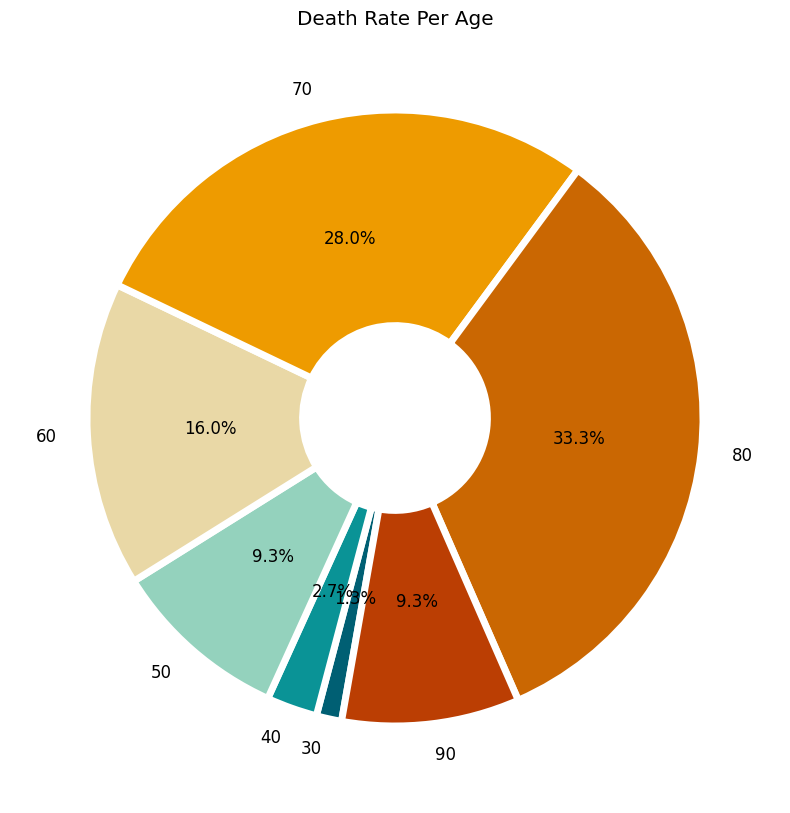

In [88]:
ratio = age_sum
labels = ['30', '40', '50', '60', '70','80','90']
colors = ['#005f73', '#0a9396','#94d2bd', '#e9d8a6', '#ee9b00', '#ca6702', '#bb3e03']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
plt.title("Death Rate Per Age")
plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False, colors=colors, wedgeprops=wedgeprops)
plt.show()

In [89]:
PI_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5165 entries, 0 to 5164
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   patient_id          5165 non-null   int64 
 1   sex                 4043 non-null   object
 2   age                 3785 non-null   object
 3   country             5165 non-null   object
 4   province            5165 non-null   object
 5   city                5071 non-null   object
 6   infection_case      4246 non-null   object
 7   infected_by         1346 non-null   object
 8   contact_number      791 non-null    object
 9   symptom_onset_date  690 non-null    object
 10  confirmed_date      5162 non-null   object
 11  released_date       1587 non-null   object
 12  deceased_date       66 non-null     object
 13  state               5165 non-null   object
dtypes: int64(1), object(13)
memory usage: 565.0+ KB


In [90]:
PI_df = PI_df.drop(1549,axis = 0)
PI_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5164 entries, 0 to 5164
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   patient_id          5164 non-null   int64 
 1   sex                 4042 non-null   object
 2   age                 3784 non-null   object
 3   country             5164 non-null   object
 4   province            5164 non-null   object
 5   city                5070 non-null   object
 6   infection_case      4246 non-null   object
 7   infected_by         1346 non-null   object
 8   contact_number      791 non-null    object
 9   symptom_onset_date  690 non-null    object
 10  confirmed_date      5161 non-null   object
 11  released_date       1587 non-null   object
 12  deceased_date       66 non-null     object
 13  state               5164 non-null   object
dtypes: int64(1), object(13)
memory usage: 605.2+ KB


In [91]:
prv_df = PI_df.groupby(['province']).province.count()
prv_df.index

Index(['Busan', 'Chungcheongbuk-do', 'Chungcheongnam-do', 'Daegu', 'Daejeon',
       'Gangwon-do', 'Gwangju', 'Gyeonggi-do', 'Gyeongsangbuk-do',
       'Gyeongsangnam-do', 'Incheon', 'Jeju-do', 'Jeollabuk-do',
       'Jeollanam-do', 'Sejong', 'Seoul', 'Ulsan'],
      dtype='object', name='province')

In [92]:
death_prv = death.loc[death.state == 'deceased']
death_prv# = death_prv.drop(["age"],axis=1)
death_prv = death_prv.groupby(['province']).province.count()
death_prv = death_prv.reindex(prv_df.index, fill_value=0)
death_prv

province
Busan                 3
Chungcheongbuk-do     0
Chungcheongnam-do     0
Daegu                20
Daejeon               1
Gangwon-do            3
Gwangju               0
Gyeonggi-do           1
Gyeongsangbuk-do     42
Gyeongsangnam-do      0
Incheon               0
Jeju-do               0
Jeollabuk-do          0
Jeollanam-do          0
Sejong                0
Seoul                 7
Ulsan                 1
Name: province, dtype: int64

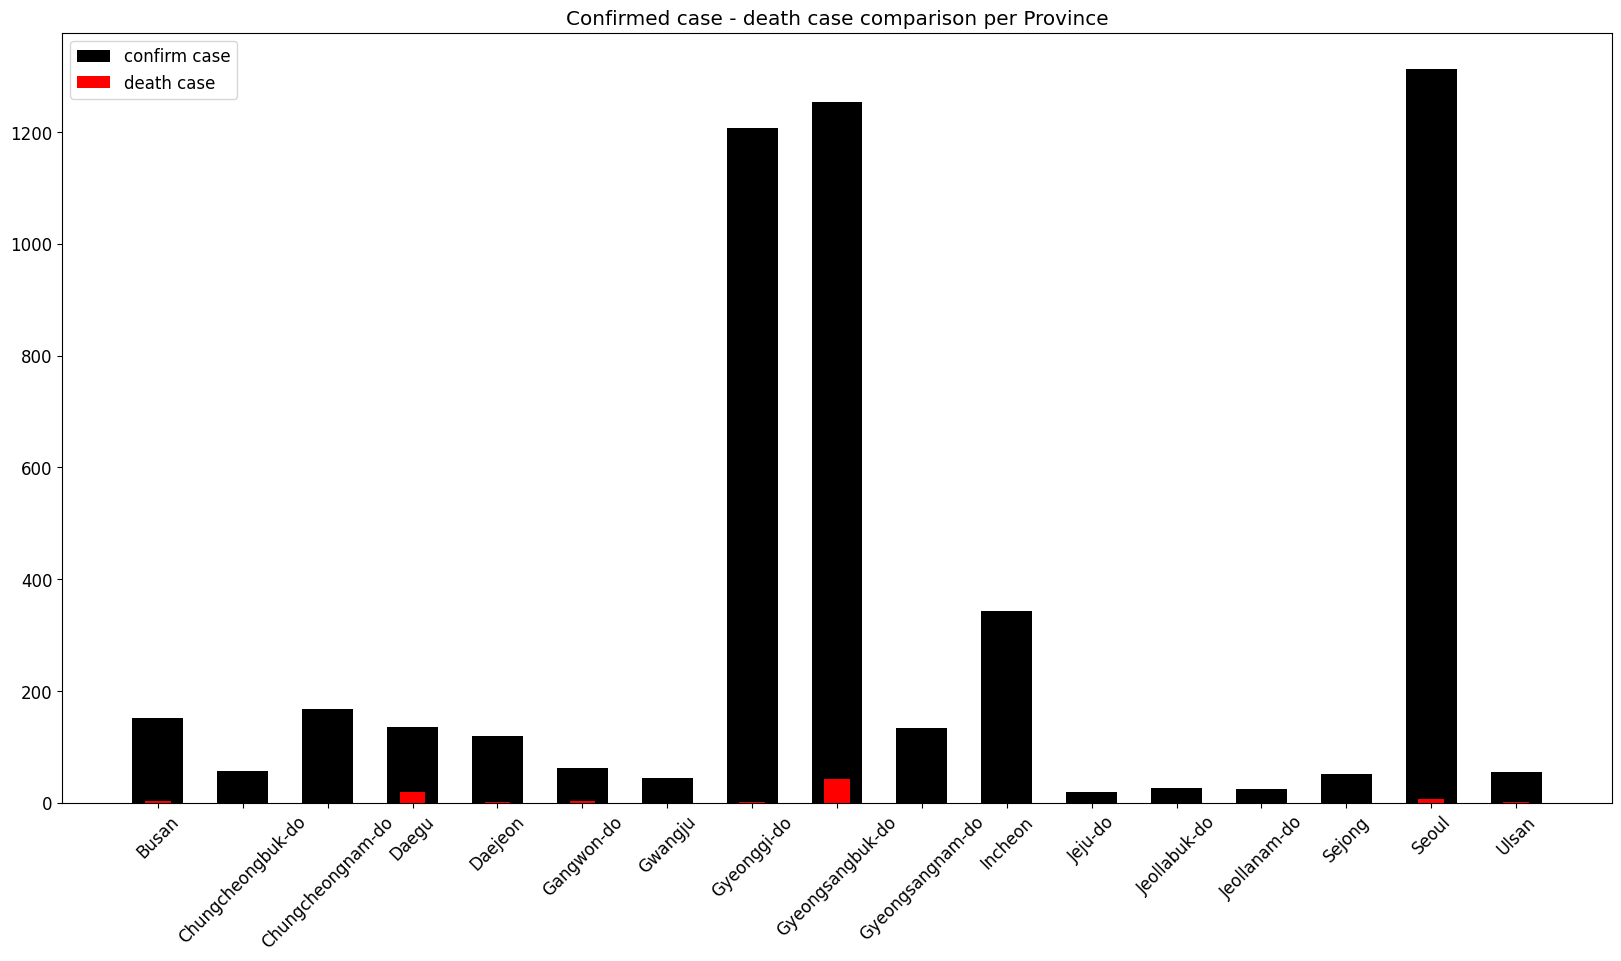

In [93]:
x_axis = prv_df.index

plt.title("Confirmed case - death case comparison per Province")
plt.bar(x_axis,prv_df,color = 'black',width = 0.6,label='confirm case')
plt.bar(x_axis,death_prv,color='red',width=0.3,label='death case')
plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.show()

In [323]:
day_prv = PI_df.iloc[:,[4,10]]
day_prv["confirmed_date"] = pd.to_datetime(day_prv["confirmed_date"])
day_prv[day_prv['confirmed_date'].isnull()]

,province,confirmed_date
4730,Gyeongsangbuk-do,NaT
4731,Gyeongsangbuk-do,NaT
4732,Gyeongsangbuk-do,NaT


In [324]:
day_prv = day_prv.drop(axis = 0,index = [4730,4731,4732])
day_prv[day_prv['confirmed_date'].isnull()]

,province,confirmed_date


In [263]:
day_prv["province"].unique()

array(['Seoul', 'Busan', 'Daegu', 'Gwangju', 'Incheon', 'Daejeon',
       'Gyeonggi-do', 'Sejong', 'Ulsan', 'Gangwon-do',
       'Chungcheongbuk-do', 'Chungcheongnam-do', 'Jeollabuk-do',
       'Jeollanam-do', 'Gyeongsangbuk-do', 'Gyeongsangnam-do', 'Jeju-do'],
      dtype=object)

In [315]:
day_index =  pd.date_range('2020-01-20', '2020-06-30')

In [444]:
#제주도 일일 확진자 수 
jeju = day_prv.loc[day_prv.province == 'Jeju-do']
jeju = jeju.groupby(['confirmed_date']).count()
jeju 

,province
confirmed_date,
2020-02-20,1
2020-02-22,1
2020-03-02,1
2020-03-04,1
2020-03-24,2
2020-03-25,1
2020-03-27,1
2020-03-29,1
2020-04-03,3


In [334]:
#경상남도 일일 확진자 수

gyeongsangnam = day_prv.loc[day_prv.province == 'Gyeongsangnam-do']
gyeongsangnam = gyeongsangnam.groupby(['confirmed_date']).count()
gyeongsangnam

,province
confirmed_date,
2020-02-20,3
2020-02-21,1
2020-02-22,4
2020-02-23,9
2020-02-24,6
2020-02-25,5
2020-02-26,15
2020-02-27,5
2020-02-28,12


In [336]:
#경상북도 일일 확진자 수

gyeongsangbuk = day_prv.loc[day_prv.province == 'Gyeongsangbuk-do']
gyeongsangbuk = gyeongsangbuk.groupby(['confirmed_date']).count()
gyeongsangbuk

,province
confirmed_date,
2020-02-18,2
2020-02-19,5
2020-02-20,12
2020-02-21,22
2020-02-22,29
...,...
2020-06-21,1
2020-06-23,2
2020-06-25,1


In [268]:
jeollanam = day_prv.loc[day_prv.province == 'Jeollanam-do']
jeollanam = jeollanam.groupby(['confirmed_date']).count()
jeollanam

,province
confirmed_date,
2020-02-06,1
2020-02-19,1
2020-02-28,1
2020-02-29,1
2020-03-01,1
2020-03-17,1
2020-03-21,1
2020-03-24,2
2020-03-28,1


In [269]:
jeollabuk = day_prv.loc[day_prv.province == 'Jeollabuk-do']
jeollabuk = jeollanam.groupby(['confirmed_date']).count()
jeollabuk

,province
confirmed_date,
2020-02-06,1
2020-02-19,1
2020-02-28,1
2020-02-29,1
2020-03-01,1
2020-03-17,1
2020-03-21,1
2020-03-24,1
2020-03-28,1


In [454]:
chungcheongnam = day_prv.loc[day_prv.province == 'Chungcheongnam-do']
chungcheongnam = chungcheongnam.groupby(['confirmed_date']).count()
chungcheongnam

,province
confirmed_date,
2020-02-21,1
2020-02-25,3
2020-02-26,5
2020-02-27,9
2020-02-28,27
2020-02-29,17
2020-03-01,14
2020-03-02,3
2020-03-03,2


In [453]:
chungcheongbuk = day_prv.loc[day_prv.province == 'Chungcheongbuk-do']
chungcheongbuk = chungcheongbuk.groupby(['confirmed_date']).count()
chungcheongbuk

,province
confirmed_date,
2020-02-20,1
2020-02-22,2
2020-02-25,3
2020-02-26,1
2020-02-27,3
2020-02-29,1
2020-03-04,1
2020-03-05,3
2020-03-06,5


In [272]:
gangwon = day_prv.loc[day_prv.province == 'Gangwon-do']
gangwon = gangwon.groupby(['confirmed_date']).count()
gangwon

,province
confirmed_date,
2020-02-22,6
2020-02-27,1
2020-02-29,1
2020-03-01,10
2020-03-02,2
2020-03-03,1
2020-03-04,4
2020-03-05,1
2020-03-07,1


In [273]:
ulsan = day_prv.loc[day_prv.province == 'Ulsan']
ulsan = ulsan.groupby(['confirmed_date']).count()
ulsan

,province
confirmed_date,
2020-02-22,1
2020-02-24,1
2020-02-25,2
2020-02-26,1
2020-02-27,5
2020-02-28,6
2020-03-01,3
2020-03-03,2
2020-03-07,1


In [449]:
sejong = day_prv.loc[day_prv.province == 'Sejong']
sejong = sejong.groupby(['confirmed_date']).count()
sejong

,province
confirmed_date,
2020-02-21,1
2020-03-07,1
2020-03-08,2
2020-03-09,2
2020-03-10,6
2020-03-11,7
2020-03-12,11
2020-03-13,1
2020-03-14,1


In [275]:
gyeonggi = day_prv.loc[day_prv.province == 'Gyeonggi-do']
gyeonggi = gyeonggi.groupby(['confirmed_date']).count()
gyeonggi

,province
confirmed_date,
2020-01-26,1
2020-01-27,1
2020-02-01,1
2020-02-02,2
2020-02-05,2
...,...
2020-06-25,5
2020-06-26,18
2020-06-27,17


In [276]:
daejeon = day_prv.loc[day_prv.province == 'Daejeon']
daejeon = daejeon.groupby(['confirmed_date']).count()
daejeon

,province
confirmed_date,
2020-02-21,1
2020-02-22,1
2020-02-23,1
2020-02-26,5
2020-02-27,1
2020-02-28,3
2020-03-01,1
2020-03-03,1
2020-03-04,3


In [538]:
incheon = day_prv.loc[day_prv.province == 'Incheon']
incheon = incheon.groupby(['confirmed_date']).count()
incheon

,province
confirmed_date,
2020-01-20,1
2020-02-22,1
2020-02-25,1
2020-02-28,3
2020-03-01,1
...,...
2020-06-26,1
2020-06-27,1
2020-06-28,1


In [278]:
seoul = day_prv.loc[day_prv.province == 'Seoul']
seoul = seoul.groupby(['confirmed_date']).count()
seoul

,province
confirmed_date,
2020-01-23,1
2020-01-30,3
2020-01-31,3
2020-02-02,1
2020-02-05,2
...,...
2020-06-25,17
2020-06-26,17
2020-06-27,14


In [502]:
busan = day_prv.loc[day_prv.province == 'Busan']
busan = busan.groupby(['confirmed_date']).count()
busan

,province
confirmed_date,
2020-02-21,2
2020-02-22,14
2020-02-23,22
2020-02-24,6
2020-02-25,11
2020-02-26,5
2020-02-27,6
2020-02-28,5
2020-02-29,5


In [568]:
daegu = day_prv.loc[day_prv.province == 'Daegu']
daegu = daegu.groupby(['confirmed_date']).count()
daegu

,province
confirmed_date,
2020-02-18,6
2020-02-19,20
2020-02-20,18
2020-02-21,1
2020-02-24,1
2020-02-25,1
2020-02-26,1
2020-02-27,2
2020-02-28,3


In [423]:
# day_index =  pd.date_range('2020-01-20', '2020-06-30')
# gwangju = day_prv.loc[day_prv.province == 'Gwangju']
# # gwangju = gwangju.groupby(['confirmed_date']).count()
# gwangju = gwangju.set_index(day_index)
# # gwangju = gwangju.reindex(day_index, fill_value=0)
# gwangju
gwangju = day_prv.loc[day_prv.province == 'Gwangju']
gwangju = gwangju.groupby(['confirmed_date']).count()
gwangju

,province
confirmed_date,
2020-02-03,1
2020-02-05,1
2020-02-20,1
2020-02-21,3
2020-02-22,2
2020-02-23,1
2020-03-02,3
2020-03-04,1
2020-03-07,1


In [478]:
day_index =  pd.date_range('2020-01-20', '2020-06-30')

gwangju = gwangju.reindex(day_index, fill_value=0)
daegu = daegu.reindex(day_index, fill_value=0)

busan = busan.reindex(day_index, fill_value=0)
seoul = seoul.reindex(day_index, fill_value=0)
incheon = incheon.reindex(day_index, fill_value=0)
daejeon = daejeon.reindex(day_index, fill_value=0)
gyeonggi = gyeonggi.reindex(day_index, fill_value=0)

sejong = sejong.reindex(day_index, fill_value=0)
ulsan = ulsan.reindex(day_index, fill_value=0)
gangwon = gangwon.reindex(day_index, fill_value=0)
chungcheongbuk = chungcheongbuk.reindex(day_index, fill_value=0)
chungcheongnam = chungcheongnam.reindex(day_index, fill_value=0)

jeollabuk = jeollabuk.reindex(day_index, fill_value=0)
jeollanam = jeollanam.reindex(day_index, fill_value=0)
gyeongsangbuk = gyeongsangbuk.reindex(day_index, fill_value=0)
gyeongsangnam = gyeongsangnam.reindex(day_index, fill_value=0)
jeju = jeju.reindex(day_index, fill_value=0)

TypeError: value should be a 'Timestamp' or 'NaT'. Got 'int' instead.

In [462]:
jeju = jeju.reindex(day_index, fill_value=0)
jeju["date"] = jeju.index
# gwangju["week"] = gwangju["date"].dt.week
# gwangju1 = gwangju.groupby(['province']).count()
jeju["date"] = pd.to_datetime(jeju["date"], errors='coerce')
jeju = jeju.groupby(jeju['date'].dt.week).sum()
jeju

,province
date,
4,0
5,0
6,0
7,0
8,2
9,0
10,2
11,0
12,0


In [461]:
gyeongsangnam = gyeongsangnam.reindex(day_index, fill_value=0)
gyeongsangnam["date"] = gyeongsangnam.index
# gwangju["week"] = gwangju["date"].dt.week
# gwangju1 = gwangju.groupby(['province']).count()
gyeongsangnam["date"] = pd.to_datetime(gyeongsangnam["date"], errors='coerce')
gyeongsangnam = gyeongsangnam.groupby(gyeongsangnam['date'].dt.week).sum()
gyeongsangnam

,province
date,
4,0
5,0
6,0
7,0
8,17
9,46
10,19
11,2
12,5


In [460]:
gyeongsangbuk = gyeongsangbuk.reindex(day_index, fill_value=0)
gyeongsangbuk["date"] = gyeongsangbuk.index
# gwangju["week"] = gwangju["date"].dt.week
# gwangju1 = gwangju.groupby(['province']).count()
gyeongsangbuk["date"] = pd.to_datetime(gyeongsangbuk["date"], errors='coerce')
gyeongsangbuk = gyeongsangbuk.groupby(gyeongsangbuk['date'].dt.week).sum()
gyeongsangbuk

,province
date,
4,0
5,0
6,0
7,0
8,104
9,390
10,455
11,61
12,96


In [459]:
jeollanam = jeollanam.reindex(day_index, fill_value=0)
jeollanam["date"] = jeollanam.index
# gwangju["week"] = gwangju["date"].dt.week
# gwangju1 = gwangju.groupby(['province']).count()
jeollanam["date"] = pd.to_datetime(jeollanam["date"], errors='coerce')
jeollanam = jeollanam.groupby(jeollanam['date'].dt.week).sum()
jeollanam

,province
date,
4,0
5,0
6,1
7,0
8,1
9,3
10,0
11,0
12,2


In [458]:
jeollabuk = jeollabuk.reindex(day_index, fill_value=0)
jeollabuk["date"] = jeollabuk.index
# gwangju["week"] = gwangju["date"].dt.week
# gwangju1 = gwangju.groupby(['province']).count()
jeollabuk["date"] = pd.to_datetime(jeollabuk["date"], errors='coerce')
jeollabuk = jeollabuk.groupby(jeollabuk['date'].dt.week).sum()
jeollabuk

,province
date,
4,0
5,0
6,1
7,0
8,1
9,3
10,0
11,0
12,2


In [455]:
chungcheongnam = chungcheongnam.reindex(day_index, fill_value=0)
chungcheongnam["date"] = chungcheongnam.index
# gwangju["week"] = gwangju["date"].dt.week
# gwangju1 = gwangju.groupby(['province']).count()
chungcheongnam["date"] = pd.to_datetime(chungcheongnam["date"], errors='coerce')
chungcheongnam1 = sejong.groupby(chungcheongnam['date'].dt.week).sum()
chungcheongnam1

,province
date,
4,0
5,0
6,0
7,0
8,1
9,0
10,3
11,29
12,2


In [440]:
chungcheongbuk = chungcheongbuk.reindex(day_index, fill_value=0)
chungcheongbuk["date"] = chungcheongbuk.index
# gwangju["week"] = gwangju["date"].dt.week
# gwangju1 = gwangju.groupby(['province']).count()
chungcheongbuk["date"] = pd.to_datetime(chungcheongbuk["date"], errors='coerce')
chungcheongbuk1 = sejong.groupby(chungcheongbuk['date'].dt.week).sum()
chungcheongbuk1

,province
date,
4,0
5,0
6,0
7,0
8,1
9,0
10,3
11,29
12,2


In [457]:
gangwon = gangwon.reindex(day_index, fill_value=0)
gangwon["date"] = gangwon.index
# gwangju["week"] = gwangju["date"].dt.week
# gwangju1 = gwangju.groupby(['province']).count()
gangwon["date"] = pd.to_datetime(gangwon["date"], errors='coerce')
gangwon1 = gangwon.groupby(gangwon['date'].dt.week).sum()
gangwon1

,province
date,
4,0
5,0
6,0
7,0
8,6
9,12
10,10
11,1
12,1


In [456]:
ulsan = ulsan.reindex(day_index, fill_value=0)
ulsan["date"] = ulsan.index
# gwangju["week"] = gwangju["date"].dt.week
# gwangju1 = gwangju.groupby(['province']).count()
ulsan["date"] = pd.to_datetime(ulsan["date"], errors='coerce')
ulsan1 = ulsan.groupby(ulsan['date'].dt.week).sum()
ulsan1

,province
date,
4,0
5,0
6,0
7,0
8,1
9,18
10,3
11,4
12,6


In [450]:
sejong = sejong.reindex(day_index, fill_value=0)
sejong["date"] = sejong.index
# gwangju["week"] = gwangju["date"].dt.week
# gwangju1 = gwangju.groupby(['province']).count()
sejong["date"] = pd.to_datetime(sejong["date"], errors='coerce')
sejong1 = sejong.groupby(sejong['date'].dt.week).sum()
sejong1

,province
date,
4,0
5,0
6,0
7,0
8,1
9,0
10,3
11,29
12,2


In [443]:
gyeonggi = gyeonggi.reindex(day_index, fill_value=0)
gyeonggi["date"] = gyeonggi.index
# gwangju["week"] = gwangju["date"].dt.week
# gwangju1 = gwangju.groupby(['province']).count()
gyeonggi["date"] = pd.to_datetime(gyeonggi["date"], errors='coerce')
gyeonggi1 = gyeonggi.groupby(gyeonggi['date'].dt.week).sum()
gyeonggi1

,province
date,
4,1
5,4
6,5
7,1
8,14
9,68
10,60
11,78
12,122


In [536]:
daejeon = daejeon.reindex(day_index, fill_value=0)
daejeon["date"] = daejeon.index
# gwangju["week"] = gwangju["date"].dt.week
# gwangju1 = gwangju.groupby(['province']).count()
daejeon["date"] = pd.to_datetime(daejeon["date"], errors='coerce')
daejeon1 = daejeon.groupby(daejeon['date'].dt.week).sum()
daejeon1

,province
date,
4,0
5,0
6,0
7,0
8,3
9,10
10,4
11,4
12,2


In [539]:
incheon = incheon.reindex(day_index, fill_value=0)
incheon["date"] = incheon.index
# gwangju["week"] = gwangju["date"].dt.week
# gwangju1 = gwangju.groupby(['province']).count()
incheon["date"] = pd.to_datetime(incheon["date"], errors='coerce')
incheon1 = incheon.groupby(incheon['date'].dt.week).sum()
incheon1

,province
date,
4,1
5,0
6,0
7,0
8,1
9,5
10,2
11,21
12,10


In [545]:
seoul = seoul.reindex(day_index, fill_value=0)
seoul["date"] = seoul.index
# gwangju["week"] = gwangju["date"].dt.week
# gwangju1 = gwangju.groupby(['province']).count()
seoul["date"] = pd.to_datetime(seoul["date"], errors='coerce')
seoul1 = seoul.groupby(seoul['date'].dt.week).sum()
seoul1

,province
date,
4,1
5,7
6,4
7,2
8,17
9,62
10,37
11,124
12,76


In [541]:
gwangju = gwangju.reindex(day_index, fill_value=0)
gwangju["date"] = gwangju.index
# gwangju["week"] = gwangju["date"].dt.week
# gwangju1 = gwangju.groupby(['province']).count()
gwangju["date"] = pd.to_datetime(gwangju["date"], errors='coerce')
gwangju1 = gwangju.groupby(gwangju['date'].dt.week).sum()
gwangju1


,province
date,
4,0
5,0
6,2
7,0
8,7
9,0
10,6
11,1
12,3


In [569]:
# daegu["date"] = daegu.index
# daegu["week"] = daegu["date"].dt.week
# daegu = daegu.groupby(['week']).count()
# daegu
daegu = daegu.reindex(day_index, fill_value=0)
daegu["date"] = daegu.index
# gwangju["week"] = gwangju["date"].dt.week
# gwangju1 = gwangju.groupby(['province']).count()
daegu["date"] = pd.to_datetime(daegu["date"], errors='coerce')
daegu = daegu.groupby(daegu['date'].dt.week).sum()
# daegu = daegu['province']
daegu

,province
date,
4,0
5,0
6,0
7,0
8,45
9,16
10,2
11,0
12,0


In [519]:
busan = busan.reindex(day_index, fill_value=0)
busan["date"] = busan.index
# gwangju["week"] = gwangju["date"].dt.week
# gwangju1 = gwangju.groupby(['province']).count()
busan["date"] = pd.to_datetime(busan["date"], errors='coerce')
busan = busan.groupby(busan['date'].dt.week).sum()
# busan = busan['province']
busan

,province
date,
4,0
5,0
6,0
7,0
8,38
9,41
10,10
11,12
12,6


In [ ]:
array([ , 'Gyeongsangbuk-do', 'Gyeongsangnam-do', 'Jeju-do'],
      dtype=object)

In [570]:
busan_list = busan['province'].tolist()
daegu_list= daegu['province'].tolist()
gwangju1_list= gwangju1['province'].tolist()
seoul_list= seoul1['province'].tolist()
incheon1_list= incheon1['province'].tolist()
jeollabuk_list= jeollabuk['province'].tolist()
daejeon1_list= daejeon1['province'].tolist()
gyeonggi1_list= gyeonggi1['province'].tolist()
sejong1_list= sejong1['province'].tolist()
ulsan1_list= ulsan1['province'].tolist()
gangwon1_list= gangwon1['province'].tolist()
chungcheongbuk1_list= chungcheongbuk1['province'].tolist()
chungcheongnam1_list= chungcheongnam1['province'].tolist()
jeollanam_list = jeollanam['province'].tolist()
gyeongsangbuk_list = gyeongsangbuk['province'].tolist()
gyeongsangnam_list = gyeongsangnam['province'].tolist()
jeju_list = jeju['province'].tolist()

In [580]:
gyeongsangnam_list

[0, 0, 0, 0, 17, 46, 19, 2, 5, 6, 15, 4, 1, 1, 0, 0, 4, 2, 0, 1, 6, 3, 1, 0]

In [586]:
gyeongsangbuk_list

[0,
 0,
 0,
 0,
 104,
 390,
 455,
 61,
 96,
 44,
 24,
 22,
 24,
 4,
 4,
 0,
 2,
 9,
 2,
 3,
 0,
 2,
 4,
 1]

In [581]:
daegu_list

[0, 0, 0, 0, 45, 16, 2, 0, 0, 0, 0, 0, 1, 14, 8, 5, 10, 2, 10, 4, 6, 7, 6, 0]

In [582]:
busan_list

[0, 0, 0, 0, 38, 41, 10, 12, 6, 9, 3, 4, 6, 5, 1, 3, 3, 0, 3, 0, 0, 3, 3, 1]

In [493]:
label = busan.index.unique()
# data = pd.DataFrame(data=data, index=index);

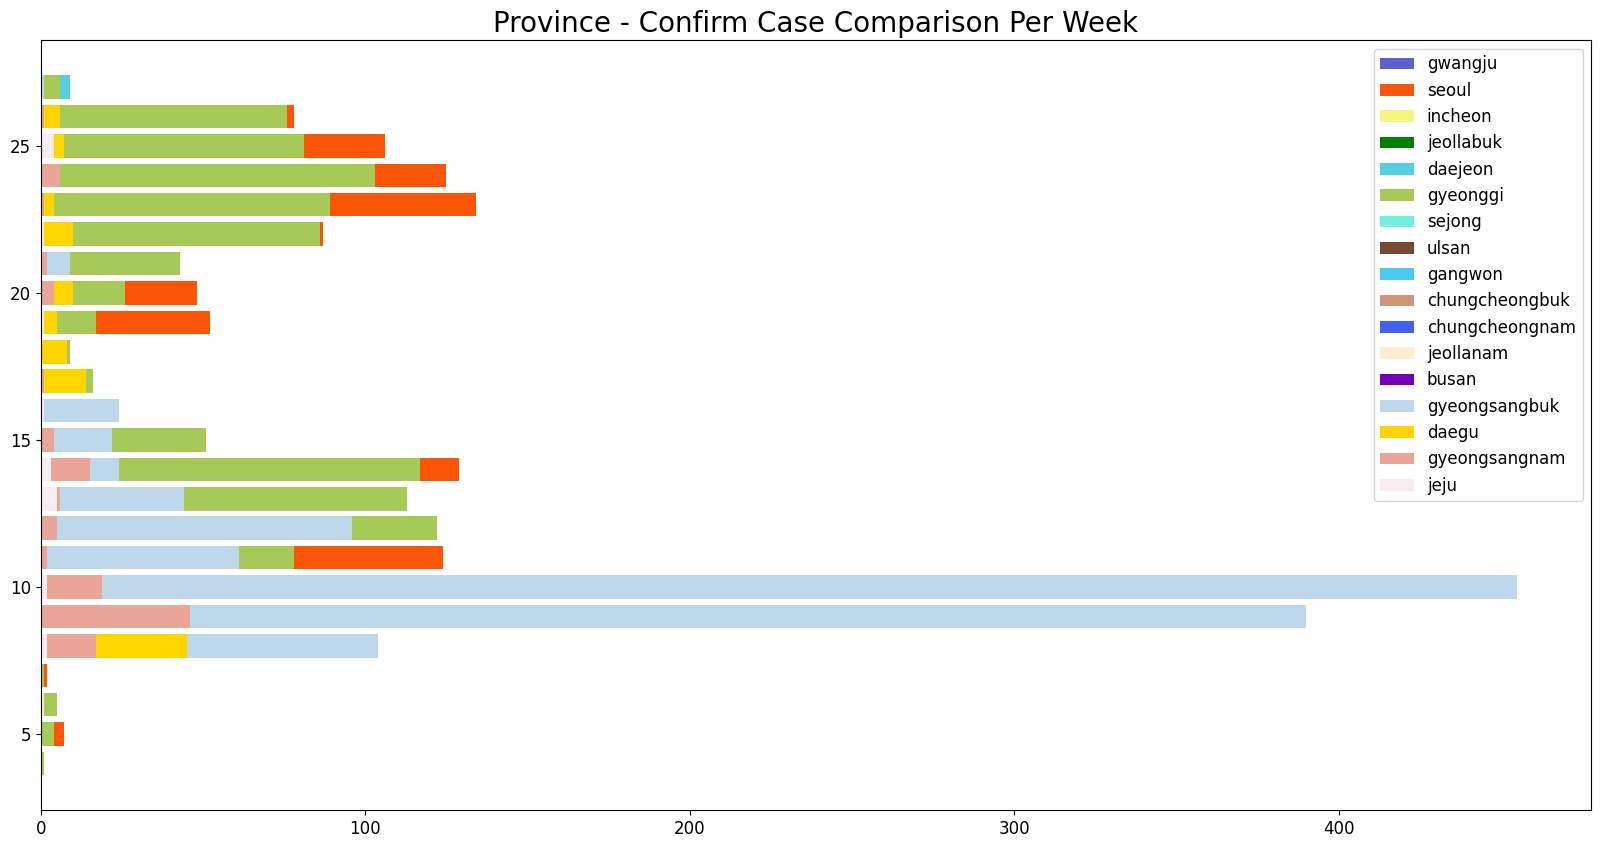

In [599]:
plt.figure(figsize=(20,10)) ## 캔버스 생성
# plt.set_facecolor('white') ## 캔버스 색상 설정
# ax = fig.add_subplot() ## 그림 뼈대(프레임) 생성
 
# ax.plot(day_index,gwangju,marker='o',label='A') ## 선그래프 생성
# ax.plot(day_index,daegu,marker='o',label='B') 
# ax.plot(day_index,busan,marker='o',label='C') 
plt.barh(label,gwangju1_list,label='gwangju',color='#5e60ce')
plt.barh(label,seoul_list,label='seoul',color='#fb5607')
plt.barh(label,incheon1_list,label='incheon',color='#f4f482')
plt.barh(label,jeollabuk_list,label='jeollabuk',color='#008000')
plt.barh(label,daejeon1_list,label='daejeon',color='#56cfe1')
plt.barh(label,gyeonggi1_list,label='gyeonggi',color='#a7c957')
plt.barh(label,sejong1_list,label='sejong',color='#72efdd')
plt.barh(label,ulsan1_list,label='ulsan',color='#774936')
plt.barh(label,gangwon1_list,label='gangwon',color='#4cc9f0')
plt.barh(label,chungcheongbuk1_list,label='chungcheongbuk',color='#cd9777')
plt.barh(label,chungcheongnam1_list,label='chungcheongnam',color='#4361ee')
plt.barh(label,jeollanam_list,label='jeollanam',color='#ffecd1')
plt.barh(label,busan_list,label='busan',color ='#7400b8')
plt.barh(label,gyeongsangbuk_list,label='gyeongsangbuk',color='#bfd7ea')
plt.barh(label,daegu_list,label='daegu',color='#ffd500')
plt.barh(label,gyeongsangnam_list,label='gyeongsangnam',color='#e8a598')
plt.barh(label,jeju_list,label='jeju',color='#f7edf0')
plt.legend()

# plt.legend() ## 범례
 
plt.title('Province - Confirm Case Comparison Per Week',fontsize=20) ## 타이틀 설정
plt.show()